<a href="https://colab.research.google.com/github/NvdSuni/Thesis-code-complete/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

!pip install optuna
!pip install imbalanced-learn

import optuna
from imblearn.over_sampling import SMOTE
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, f1_score
import joblib
from sklearn.linear_model import LogisticRegression


from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
from imblearn.over_sampling import SMOTE
import optuna
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.linear_model import LogisticRegression
import joblib
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import __version__ as sklearn_utils_version
import seaborn as sns

import imblearn
imblearn_version = imblearn.__version__

print(f"optuna: {optuna.__version__}")
print(f"imbalanced-learn: {imblearn_version}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {plt.matplotlib.__version__}")
print(f"scikit-learn: {sklearn_version}")
print(f"joblib: {joblib.__version__}")
print(f"PIL (Pillow): {Image.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"scikit-learn.utils: {sklearn_utils_version}")
print(f"seaborn: {sns.__version__}")


optuna: 3.5.0
imbalanced-learn: 0.10.1
numpy: 1.23.5
matplotlib: 3.7.1
scikit-learn: 1.2.2
joblib: 1.3.2
PIL (Pillow): 9.4.0
tensorflow: 2.15.0
scikit-learn.utils: 1.2.2
seaborn: 0.12.2


#Load in the data

In [3]:
X_test_combined = np.load("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/X_test_combined.npy")
y_test_combined = np.load("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/y_test_combined.npy")
X_test_Xray = np.load("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/X_test_Xray_reduced.npy")
y_test_Xray = np.load("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/test_labels_complete_Xray.npy")
X_test_MRI = np.load("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/X_test_MRNet_reduced.npy")
y_test_MRI = np.load("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/y_test_MRNet.npy")

In [9]:
print(y_test_Xray)
y_test_Xray = np.argmax(y_test_Xray, axis=1)
X_test_Xray, y_test_Xray = shuffle(X_test_Xray, y_test_Xray, random_state=42)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [10]:
print(y_test_MRI)

X_test_MRI, y_test_MRI = shuffle(X_test_MRI, y_test_MRI, random_state=42)
print(y_test_MRI)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
[1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 1]


# ================================================================================

#Logistic Regression - COMBINED

In [ ]:
logistic_regression_base = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Logistic Regression/logistic_regression.joblib')
logistic_regression_tuned = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Logistic Regression/logistic_regression_tuned.joblib')
logistic_regression_tuned_smote = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Logistic Regression/logistic_regression_tuned_smote.joblib')

In [ ]:
predictions = logistic_regression_base.predict(X_test_combined)

report = classification_report(y_test_combined, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_combined, logistic_regression_base.predict_proba(X_test_combined), multi_class = "ovr")
print("ROC-AUC Score:", roc_auc)
print(logistic_regression_base.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.38      1.00      0.55      1278
           1       0.00      0.00      0.00       592
           2       0.00      0.00      0.00       894
           3       0.00      0.00      0.00       446
           4       0.00      0.00      0.00       102
           5       0.69      0.36      0.47        25
           6       0.96      0.28      0.44        95

    accuracy                           0.38      3432
   macro avg       0.29      0.23      0.21      3432
weighted avg       0.17      0.38      0.22      3432

ROC-AUC Score: 0.6225221935365889
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
micro_f1 = f1_score(y_test_combined, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.38286713286713286


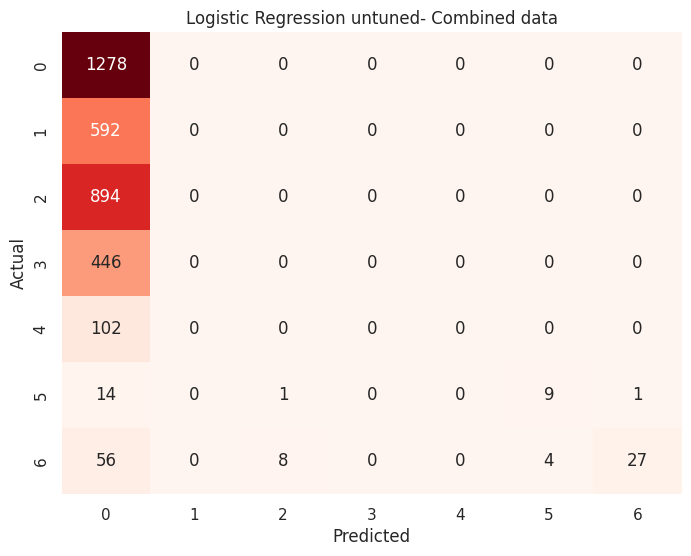

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=np.unique(y_test_combined), yticklabels=np.unique(y_test_combined))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression untuned- Combined data')
plt.show()

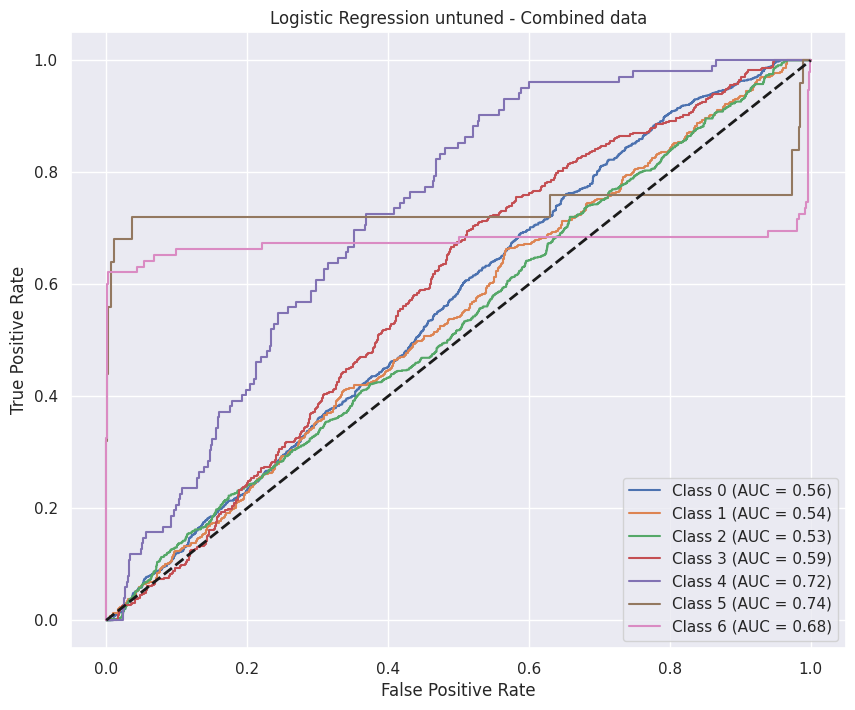

In [ ]:
n_classes = 7

y_test_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

roc_auc_class = dict()
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], logistic_regression_base.predict_proba(X_test_combined)[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression untuned - Combined data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = logistic_regression_tuned.predict(X_test_combined)

report = classification_report(y_test_combined, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_combined, logistic_regression_tuned.predict_proba(X_test_combined), multi_class = "ovr")
print("ROC-AUC Score:", roc_auc)
print(logistic_regression_tuned.get_params())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.38      1.00      0.55      1278
           1       0.00      0.00      0.00       592
           2       0.00      0.00      0.00       894
           3       0.00      0.00      0.00       446
           4       0.00      0.00      0.00       102
           5       0.69      0.44      0.54        25
           6       0.95      0.41      0.57        95

    accuracy                           0.39      3432
   macro avg       0.29      0.26      0.24      3432
weighted avg       0.17      0.39      0.23      3432

ROC-AUC Score: 0.6240999325694216
{'C': 1.1852445146700843, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 132, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.008630378678775604, 'verbose': 0, 'warm_start': False}


In [ ]:
micro_f1 = f1_score(y_test_combined, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.38694638694638694


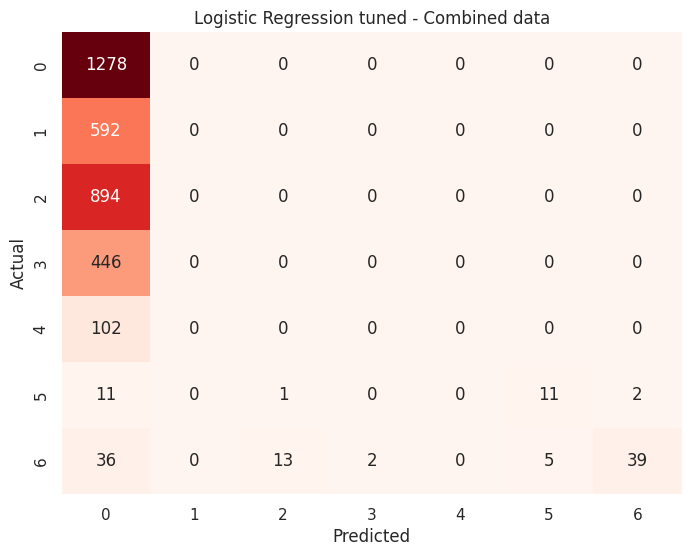

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=np.unique(y_test_combined), yticklabels=np.unique(y_test_combined))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression tuned - Combined data')
plt.show()

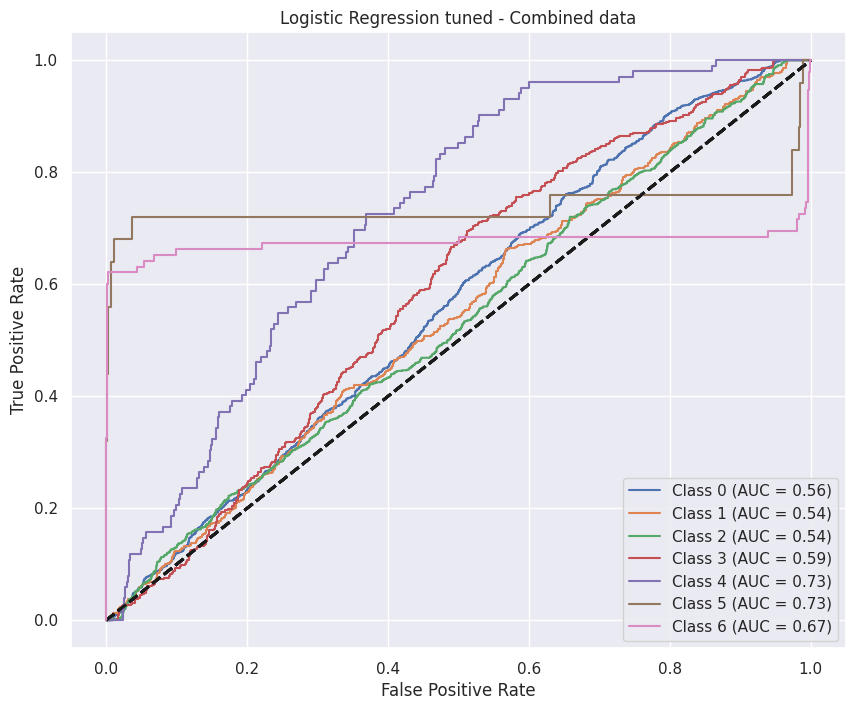

In [ ]:
n_classes = 7

y_test_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

roc_auc_class = dict()
for i in range(n_classes):
    roc_auc_class[i] = roc_auc_score(y_test_binary[:, i], logistic_regression_tuned.predict_proba(X_test_combined)[:, i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(n_classes):
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression tuned - Combined data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = logistic_regression_tuned_smote.predict(X_test_combined)

report = classification_report(y_test_combined, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_combined, logistic_regression_tuned_smote.predict_proba(X_test_combined), multi_class = "ovr")
print("ROC-AUC Score:", roc_auc)
print(logistic_regression_tuned_smote.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.26      0.32      1278
           1       0.18      0.20      0.19       592
           2       0.28      0.22      0.25       894
           3       0.16      0.20      0.18       446
           4       0.06      0.35      0.11       102
           5       0.44      0.60      0.51        25
           6       0.41      0.59      0.48        95

    accuracy                           0.24      3432
   macro avg       0.28      0.35      0.29      3432
weighted avg       0.30      0.24      0.26      3432

ROC-AUC Score: 0.6090119728261775
{'C': 0.42224536401831936, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 346, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.09904190248268234, 'verbose': 0, 'warm_start': False}


In [ ]:
micro_f1 = f1_score(y_test_combined, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.24417249417249418


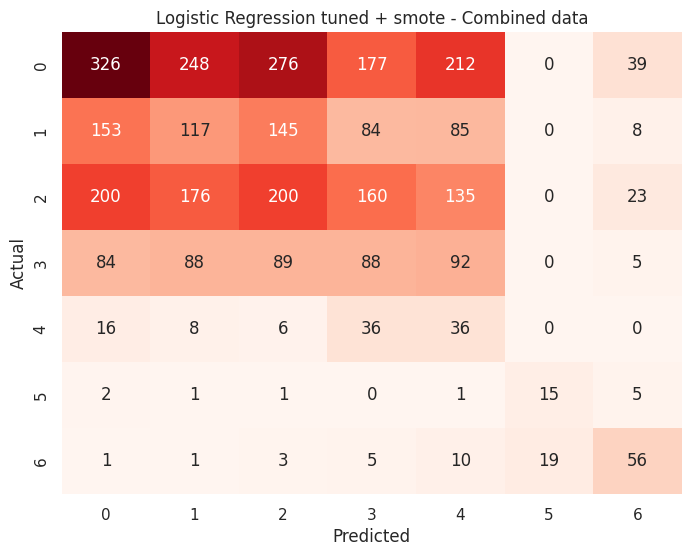

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=np.unique(y_test_combined), yticklabels=np.unique(y_test_combined))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression tuned + smote - Combined data')
plt.show()

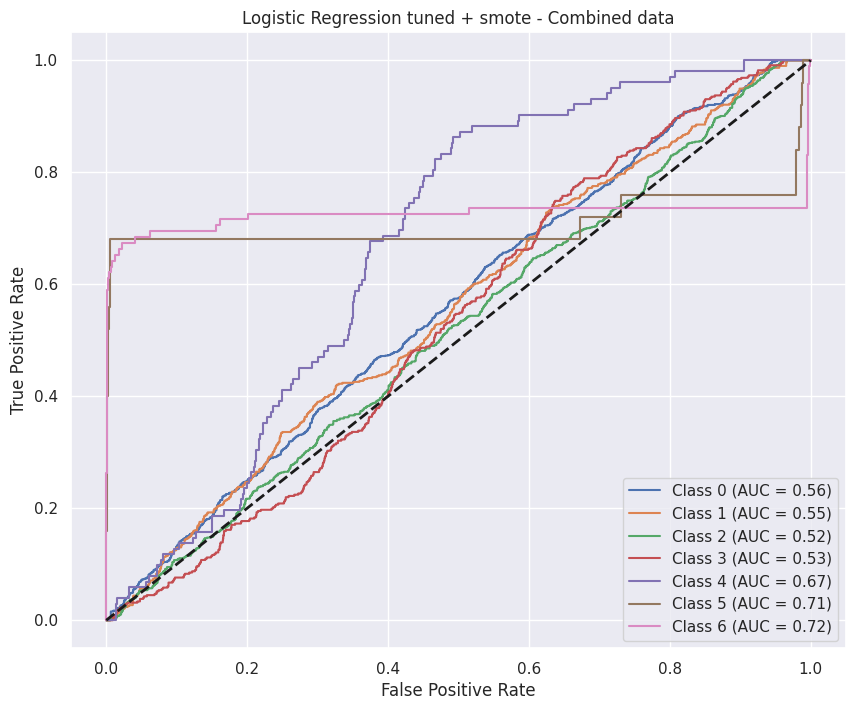

In [ ]:
y_test_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], logistic_regression_tuned_smote.predict_proba(X_test_combined)[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression tuned + smote - Combined data')
plt.legend(loc="lower right")
plt.show()

#Logistic Regression - XRAY

In [ ]:
logistic_regression_base_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Logistic Regression/logistic_regression_Xray.joblib')
logistic_regression_tuned_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Logistic Regression/logistic_regression_tuned_Xray.joblib')
logistic_regression_tuned_smote_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Logistic Regression/logistic_regression_tuned_smote_Xray.joblib')

In [ ]:
predictions = logistic_regression_base_Xray.predict(X_test_Xray)

report = classification_report(y_test_Xray, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_Xray, logistic_regression_base_Xray.predict_proba(X_test_Xray), multi_class = "ovr")
print("ROC-AUC Score:", roc_auc)
print(logistic_regression_base_Xray.get_params())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.98      0.55      1278
           1       0.00      0.00      0.00       592
           2       0.18      0.01      0.02       894
           3       0.00      0.00      0.00       446
           4       0.00      0.00      0.00       102

    accuracy                           0.38      3312
   macro avg       0.11      0.20      0.11      3312
weighted avg       0.20      0.38      0.22      3312

ROC-AUC Score: 0.5003641684530147
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
micro_f1 = f1_score(y_test_Xray, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3804347826086957


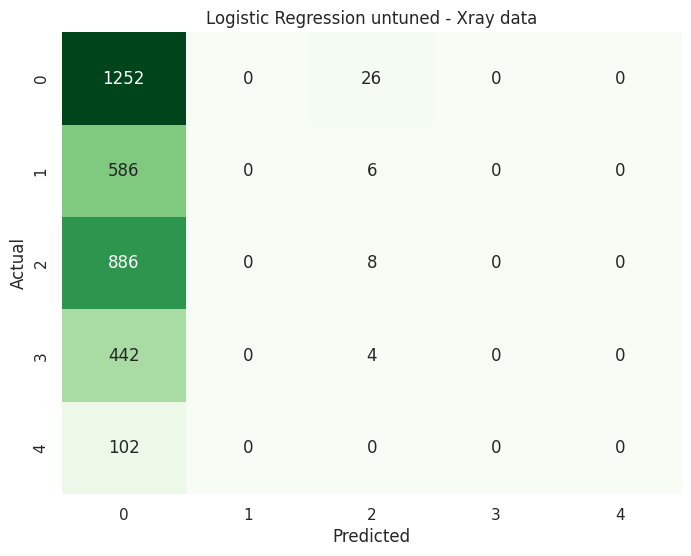

In [ ]:
conf_matrix = confusion_matrix(y_test_Xray, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=np.unique(y_test_Xray), yticklabels=np.unique(y_test_Xray))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression untuned - Xray data')
plt.show()

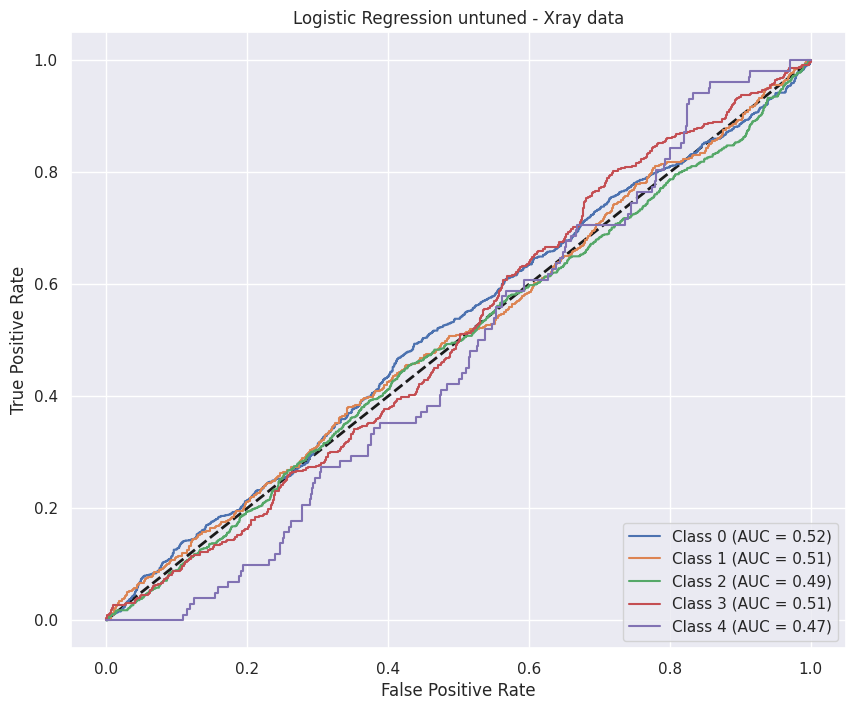

In [ ]:
y_test_binary = label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(np.unique(y_test_Xray).shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], logistic_regression_base_Xray.predict_proba(X_test_Xray)[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

for i in range(np.unique(y_test_Xray).shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression untuned - Xray data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = logistic_regression_tuned_Xray.predict(X_test_Xray)

report = classification_report(y_test_Xray, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_Xray, logistic_regression_tuned_Xray.predict_proba(X_test_Xray), multi_class = "ovr")
print("ROC-AUC Score:", roc_auc)
print(logistic_regression_tuned_Xray.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.48      0.45      1278
           1       0.19      0.10      0.13       592
           2       0.31      0.24      0.27       894
           3       0.16      0.28      0.21       446
           4       0.00      0.00      0.00       102

    accuracy                           0.31      3312
   macro avg       0.22      0.22      0.21      3312
weighted avg       0.30      0.31      0.30      3312

ROC-AUC Score: 0.5851707819016562
{'C': 0.12199814750968596, 'class_weight': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 322, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.047310077349223205, 'verbose': 0, 'warm_start': False}


In [ ]:
micro_f1 = f1_score(y_test_Xray, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.30766908212560384


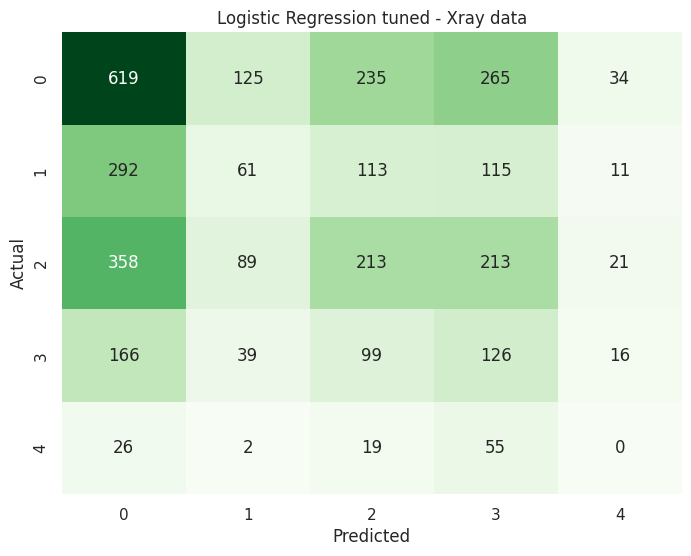

In [ ]:
conf_matrix = confusion_matrix(y_test_Xray, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=np.unique(y_test_Xray), yticklabels=np.unique(y_test_Xray))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression tuned - Xray data')
plt.show()

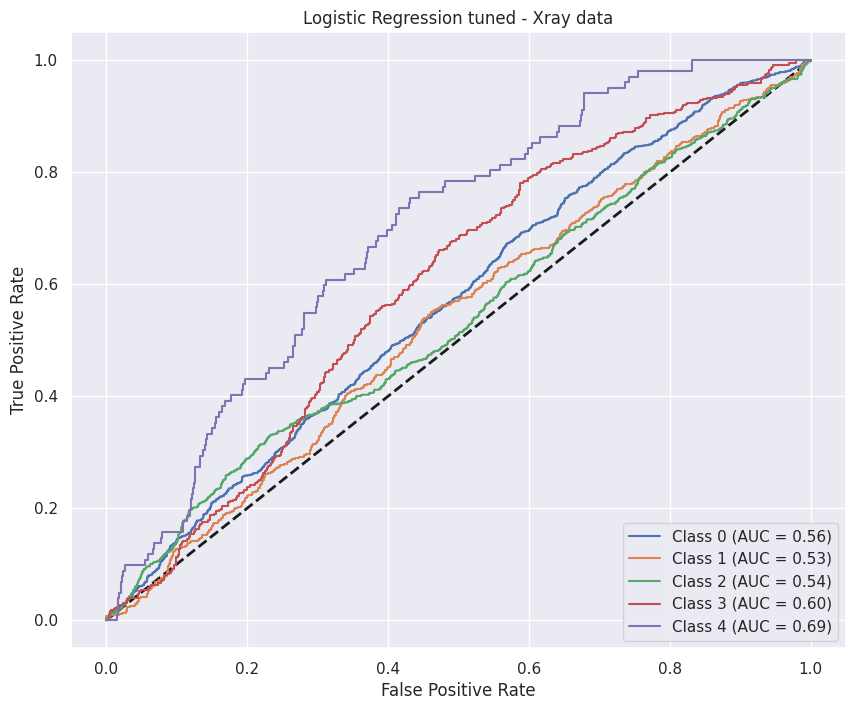

In [ ]:
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(np.unique(y_test_Xray).shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], logistic_regression_tuned_Xray.predict_proba(X_test_Xray)[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

for i in range(np.unique(y_test_Xray).shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression tuned - Xray data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = logistic_regression_tuned_smote_Xray.predict(X_test_Xray)

report = classification_report(y_test_Xray, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_Xray, logistic_regression_tuned_smote_Xray.predict_proba(X_test_Xray), multi_class = "ovr")
print("ROC-AUC Score:", roc_auc)
print(logistic_regression_tuned_smote_Xray.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.22      0.29      1278
           1       0.21      0.17      0.19       592
           2       0.33      0.13      0.19       894
           3       0.15      0.16      0.15       446
           4       0.05      0.69      0.10       102

    accuracy                           0.19      3312
   macro avg       0.24      0.27      0.18      3312
weighted avg       0.32      0.19      0.22      3312

ROC-AUC Score: 0.5863576320881575
{'C': 7.520544957469748, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 849, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.09978325289145051, 'verbose': 0, 'warm_start': False}


In [ ]:
micro_f1 = f1_score(y_test_Xray, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.19293478260869565


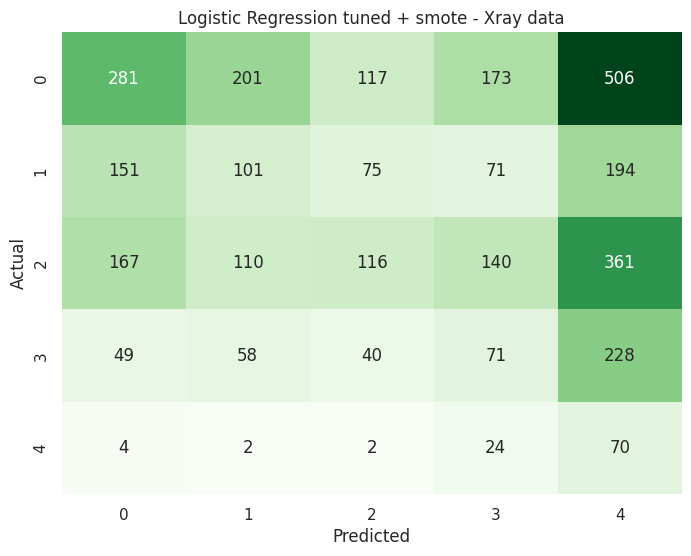

In [ ]:
conf_matrix = confusion_matrix(y_test_Xray, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=np.unique(y_test_Xray), yticklabels=np.unique(y_test_Xray))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression tuned + smote - Xray data')
plt.show()

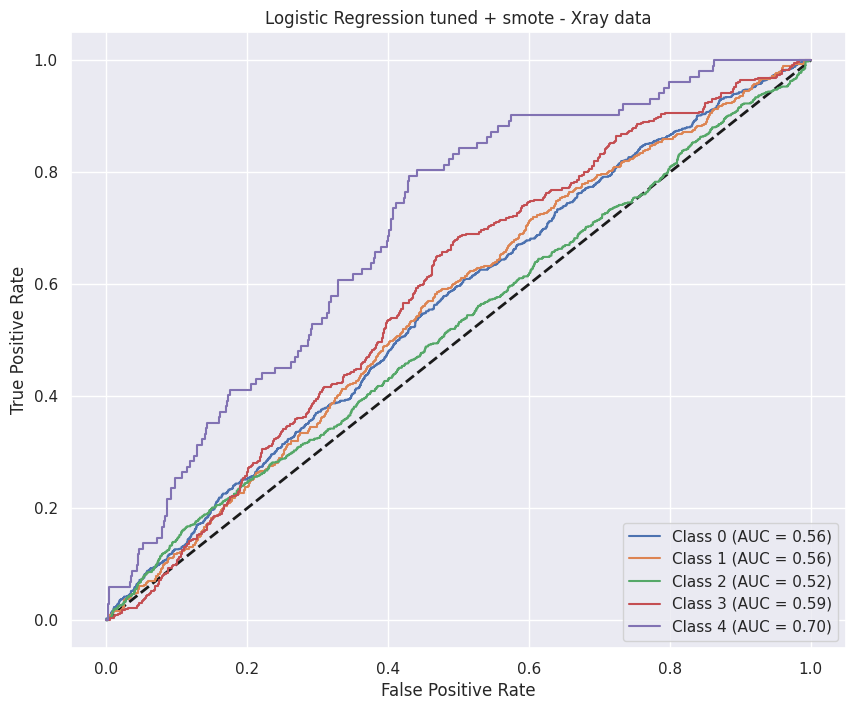

In [ ]:
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(np.unique(y_test_Xray).shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], logistic_regression_tuned_smote_Xray.predict_proba(X_test_Xray)[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

for i in range(np.unique(y_test_Xray).shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression tuned + smote - Xray data')
plt.legend(loc="lower right")
plt.show()


#Logistic Regression - MRI

In [ ]:
logistic_regression_base_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Logistic Regression/logistic_regression_MRI.joblib')
logistic_regression_tuned_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Logistic Regression/logistic_regression_tuned_MRI.joblib')
logistic_regression_tuned_smote_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Logistic Regression/logistic_regression_tuned_smote_MRI.joblib')

In [ ]:
y_test_MRI.shape

(120,)

In [ ]:
predictions = logistic_regression_base_MRI.predict(X_test_MRI)

report = classification_report(y_test_MRI, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_MRI, logistic_regression_base_MRI.predict_proba(X_test_MRI)[:, 1])
print("ROC-AUC Score:", roc_auc)
print(logistic_regression_base_MRI.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.36      0.49        25
           1       0.85      0.97      0.91        95

    accuracy                           0.84       120
   macro avg       0.80      0.66      0.70       120
weighted avg       0.83      0.84      0.82       120

ROC-AUC Score: 0.8240000000000001
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predictions, average='micro')

print("Micro F1 Score:", micro_f1_MRI)

Micro F1 Score: 0.8416666666666667


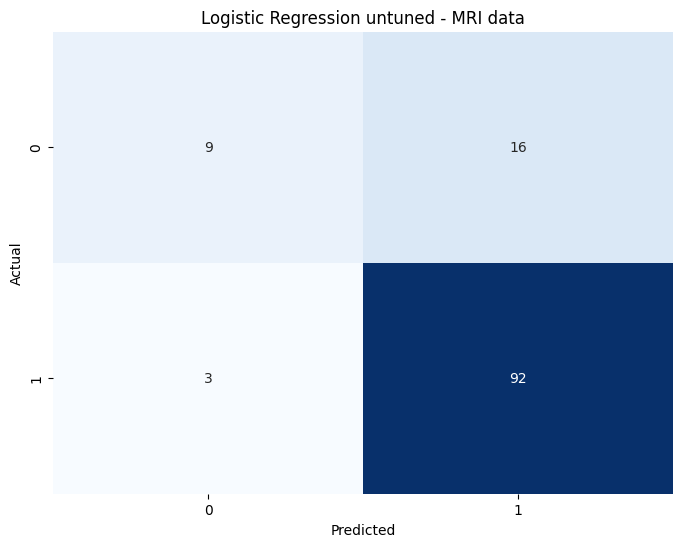

In [ ]:
conf_matrix = confusion_matrix(y_test_MRI, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_MRI), yticklabels=np.unique(y_test_MRI))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression untuned - MRI data')
plt.show()

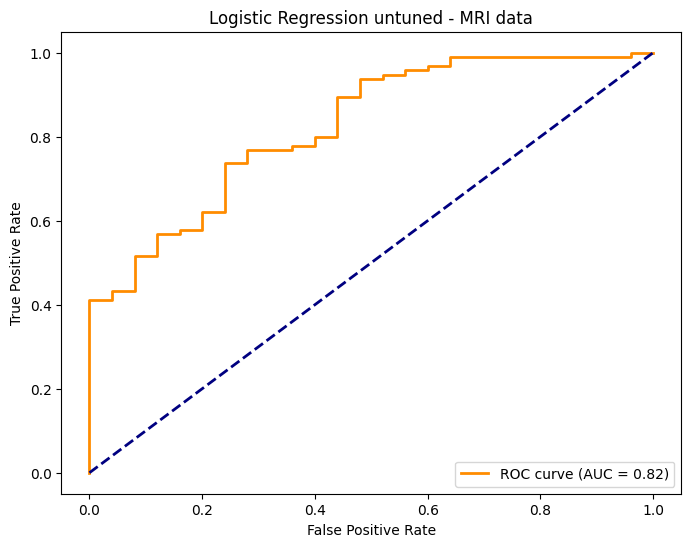

In [ ]:
fpr, tpr, _ = roc_curve(y_test_MRI, logistic_regression_base_MRI.predict_proba(X_test_MRI)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression untuned - MRI data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = logistic_regression_tuned_MRI.predict(X_test_MRI)

report = classification_report(y_test_MRI, predictions)
print("Classification Report:\n", report)


roc_auc = roc_auc_score(y_test_MRI, logistic_regression_tuned_MRI.predict_proba(X_test_MRI)[:, 1])
print("ROC-AUC Score:", roc_auc)
print(logistic_regression_tuned_MRI.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.68      0.49        25
           1       0.89      0.72      0.80        95

    accuracy                           0.71       120
   macro avg       0.64      0.70      0.64       120
weighted avg       0.79      0.71      0.73       120

ROC-AUC Score: 0.8025263157894736
{'C': 5.346073252506049, 'class_weight': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 677, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.047516857492817116, 'verbose': 0, 'warm_start': False}


In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predictions, average='micro')

print("Micro F1 Score:", micro_f1_MRI)

Micro F1 Score: 0.7083333333333334


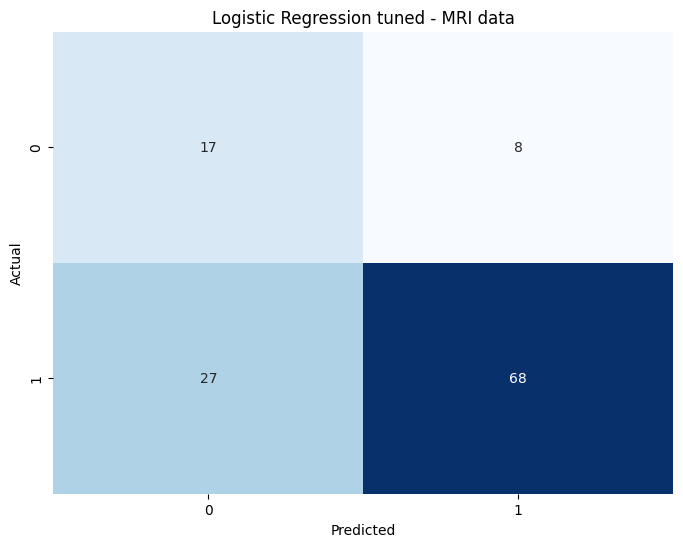

In [ ]:
conf_matrix = confusion_matrix(y_test_MRI, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_MRI), yticklabels=np.unique(y_test_MRI))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression tuned - MRI data')
plt.show()

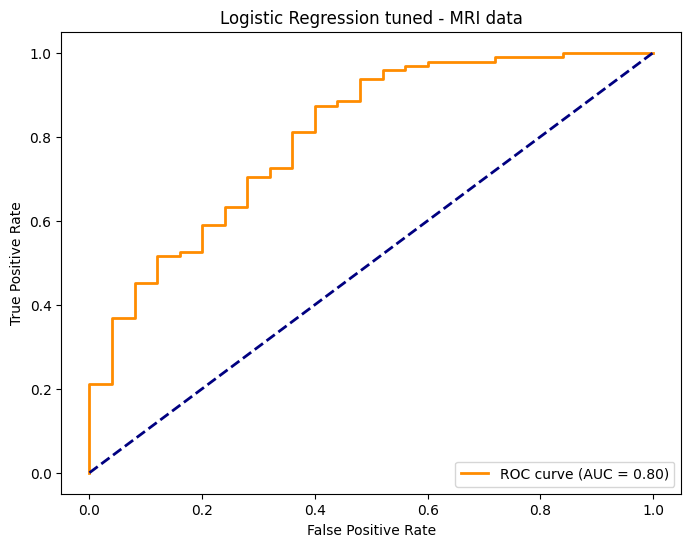

In [ ]:
fpr, tpr, _ = roc_curve(y_test_MRI, logistic_regression_tuned_MRI.predict_proba(X_test_MRI)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression tuned - MRI data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = logistic_regression_tuned_smote_MRI.predict(X_test_MRI)

report = classification_report(y_test_MRI, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_MRI, logistic_regression_tuned_smote_MRI.predict_proba(X_test_MRI)[:, 1])
print("ROC-AUC Score:", roc_auc)
print(logistic_regression_tuned_smote_MRI.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.76      0.53        25
           1       0.92      0.71      0.80        95

    accuracy                           0.72       120
   macro avg       0.66      0.73      0.66       120
weighted avg       0.81      0.72      0.74       120

ROC-AUC Score: 0.8235789473684211
{'C': 5.650037366348889, 'class_weight': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 914, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.07528416069338939, 'verbose': 0, 'warm_start': False}


In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predictions, average='micro')

print("Micro F1 Score:", micro_f1_MRI)

Micro F1 Score: 0.7166666666666667


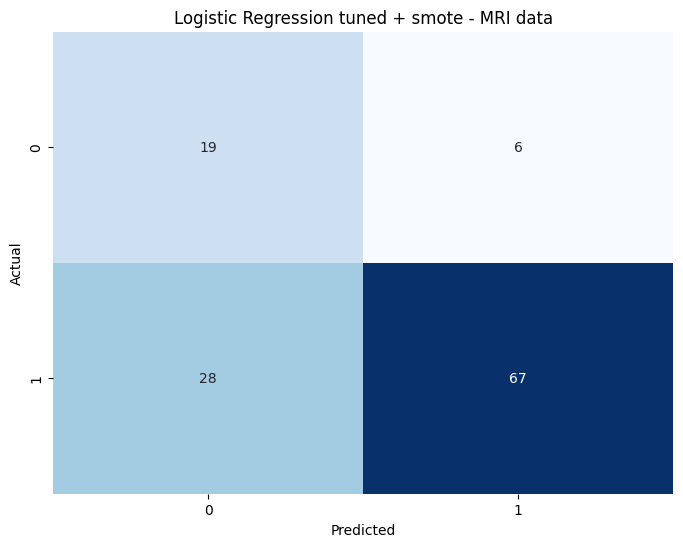

In [ ]:
conf_matrix = confusion_matrix(y_test_MRI, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_MRI), yticklabels=np.unique(y_test_MRI))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression tuned + smote - MRI data')
plt.show()

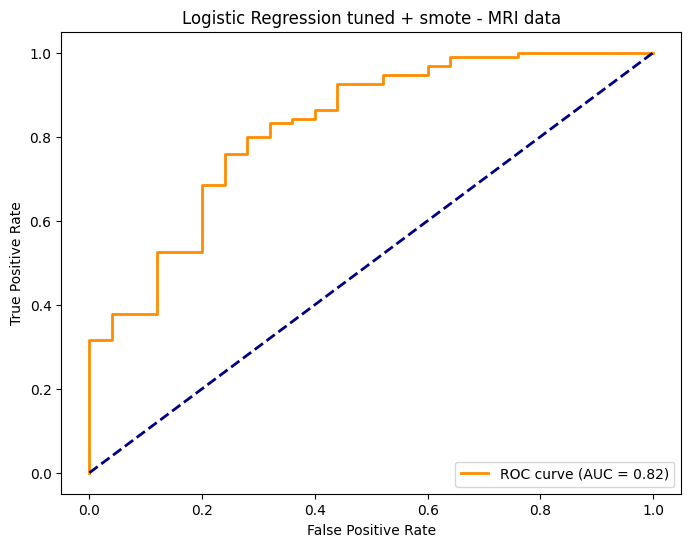

In [ ]:
fpr, tpr, _ = roc_curve(y_test_MRI, logistic_regression_tuned_smote_MRI.predict_proba(X_test_MRI)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression tuned + smote - MRI data')
plt.legend(loc="lower right")
plt.show()

# ==============================================================================

# FNN - COMBINED

In [ ]:
FNN_base = tf.keras.models.load_model("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/FFN/FFN")
FNN_tuned = tf.keras.models.load_model("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/FFN/FFN_tuned")
FNN_tuned_smote = tf.keras.models.load_model("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/FFN/FFN_tuned_smote")

In [ ]:
predictions = FNN_base.predict(X_test_combined)

predicted_labels = np.argmax(predictions, axis=1)

report = classification_report(y_test_combined, predicted_labels)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_combined, predictions, multi_class="ovr")
print("ROC-AUC Score:", roc_auc)

FNN_base.summary()

108/108 [==============================] - 0s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.46      0.44      1278
           1       0.17      0.16      0.17       592
           2       0.30      0.35      0.33       894
           3       0.22      0.16      0.18       446
           4       0.12      0.07      0.09       102
           5       0.53      0.32      0.40        25
           6       0.84      0.91      0.87        95

    accuracy                           0.34      3432
   macro avg       0.38      0.35      0.35      3432
weighted avg       0.33      0.34      0.33      3432

ROC-AUC Score: 0.6637382398559811
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 64)                4160      
                                                                 
 de

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)

micro_f1 = f1_score(y_test_combined, predicted_labels, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.33974358974358976


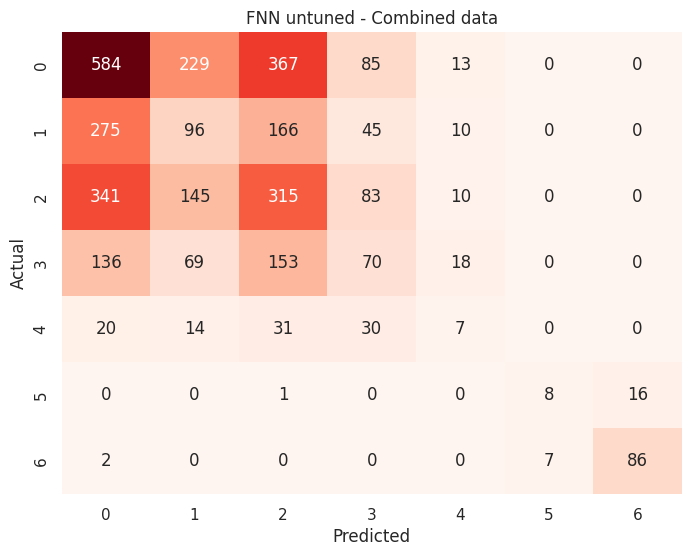

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=np.unique(y_test_combined), yticklabels=np.unique(y_test_combined))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FNN untuned - Combined data')
plt.show()

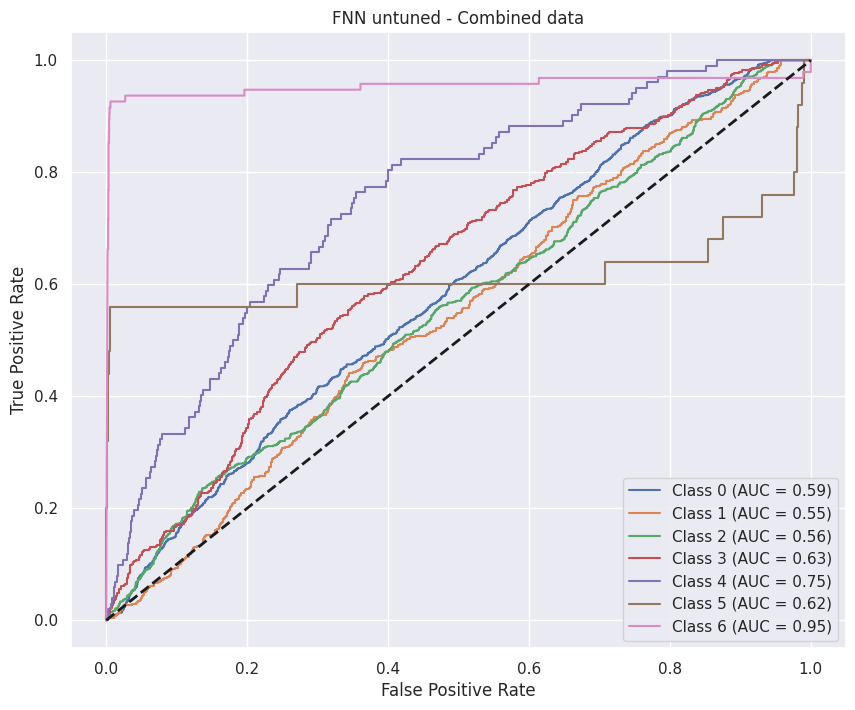

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 64)                4160      
                                                                 
 dense_151 (Dense)           (None, 32)                2080      
                                                                 
 dense_152 (Dense)           (None, 7)                 231       
                                                                 
Total params: 6471 (25.28 KB)
Trainable params: 6471 (25.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_test_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], predictions[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN untuned - Combined data')
plt.legend(loc="lower right")
plt.show()

FNN_base.summary()

In [ ]:
predictions = FNN_tuned.predict(X_test_combined)

predicted_labels = np.argmax(predictions, axis=1)

report = classification_report(y_test_combined, predicted_labels)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_combined, predictions, multi_class="ovr")
print("ROC-AUC Score:", roc_auc)

model_config = FNN_tuned.get_config()
print("Model Configuration:\n", model_config)

FNN_tuned.summary()

108/108 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.46      0.45      1278
           1       0.21      0.17      0.19       592
           2       0.30      0.34      0.32       894
           3       0.23      0.21      0.22       446
           4       0.08      0.05      0.06       102
           5       0.75      0.36      0.49        25
           6       0.82      0.93      0.87        95

    accuracy                           0.35      3432
   macro avg       0.40      0.36      0.37      3432
weighted avg       0.34      0.35      0.34      3432

ROC-AUC Score: 0.7350361318833792
Model Configuration:
 {'name': 'sequential_434', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 64), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_2143_input'}, 'registered_name': None}, {'module': 'keras.laye

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)

micro_f1 = f1_score(y_test_combined, predicted_labels, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3476107226107226


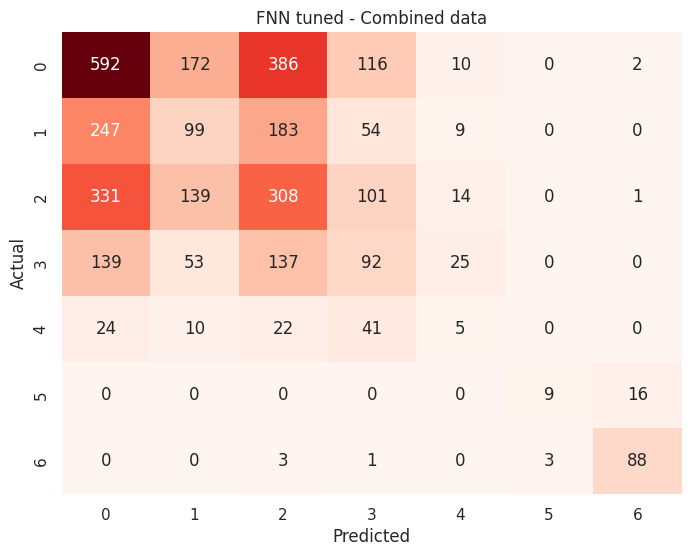

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=np.unique(y_test_combined), yticklabels=np.unique(y_test_combined))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FNN tuned - Combined data')
plt.show()

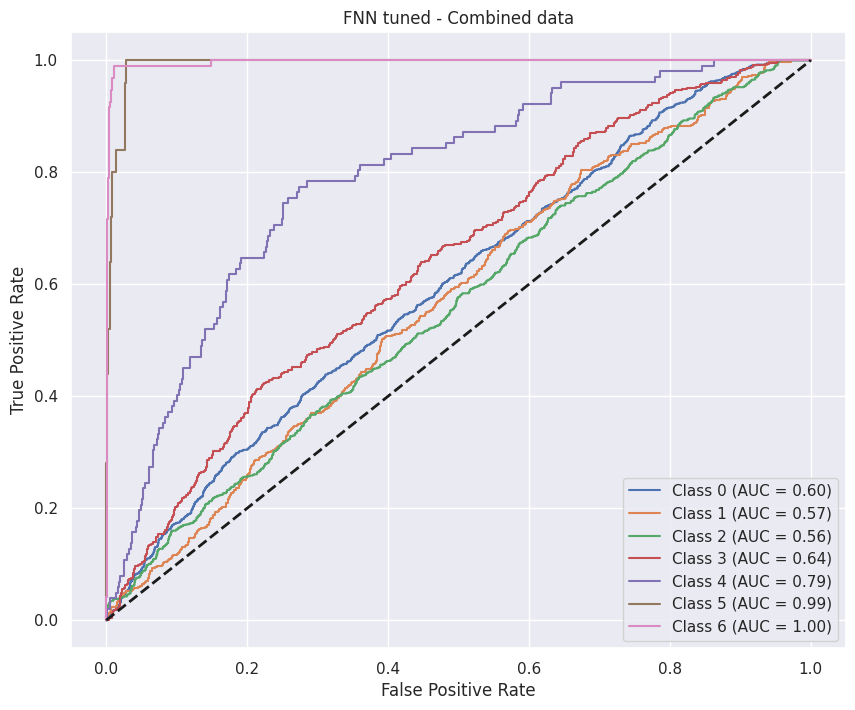

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 64)                4160      
                                                                 
 dense_151 (Dense)           (None, 32)                2080      
                                                                 
 dense_152 (Dense)           (None, 7)                 231       
                                                                 
Total params: 6471 (25.28 KB)
Trainable params: 6471 (25.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_test_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], predictions[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN tuned - Combined data')
plt.legend(loc="lower right")
plt.show()

FNN_base.summary()

In [ ]:
predictions = FNN_tuned_smote.predict(X_test_combined)

predicted_labels = np.argmax(predictions, axis=1)

report = classification_report(y_test_combined, predicted_labels)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_combined, predictions, multi_class="ovr")
print("ROC-AUC Score:", roc_auc)

model_config = FNN_tuned_smote.get_config()
print("Model Configuration:\n", model_config)

FNN_tuned_smote.summary()

108/108 [==============================] - 1s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.29      0.35      1278
           1       0.21      0.23      0.22       592
           2       0.32      0.34      0.33       894
           3       0.21      0.35      0.26       446
           4       0.14      0.24      0.17       102
           5       0.64      0.36      0.46        25
           6       0.85      0.95      0.90        95

    accuracy                           0.31      3432
   macro avg       0.40      0.39      0.38      3432
weighted avg       0.35      0.31      0.32      3432

ROC-AUC Score: 0.7158252009173388
Model Configuration:
 {'name': 'sequential_635', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 64), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_3031_input'}, 'registered_name': None}, {'module': 'keras.laye

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)

micro_f1 = f1_score(y_test_combined, predicted_labels, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3146853146853147


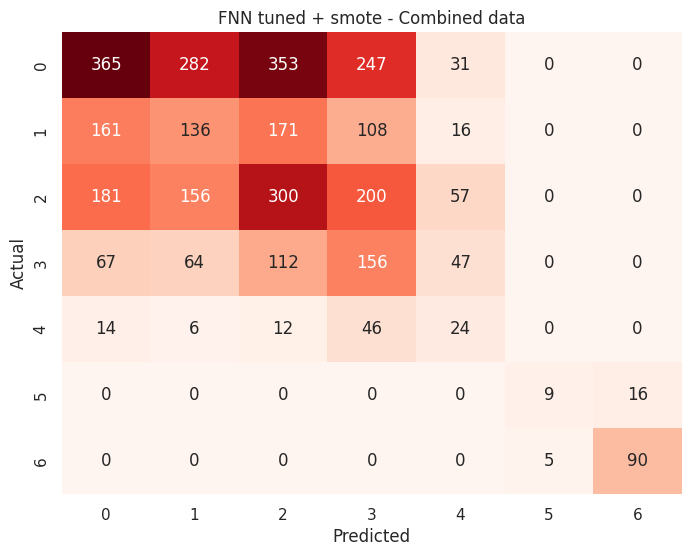

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=np.unique(y_test_combined), yticklabels=np.unique(y_test_combined))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FNN tuned + smote - Combined data')
plt.show()

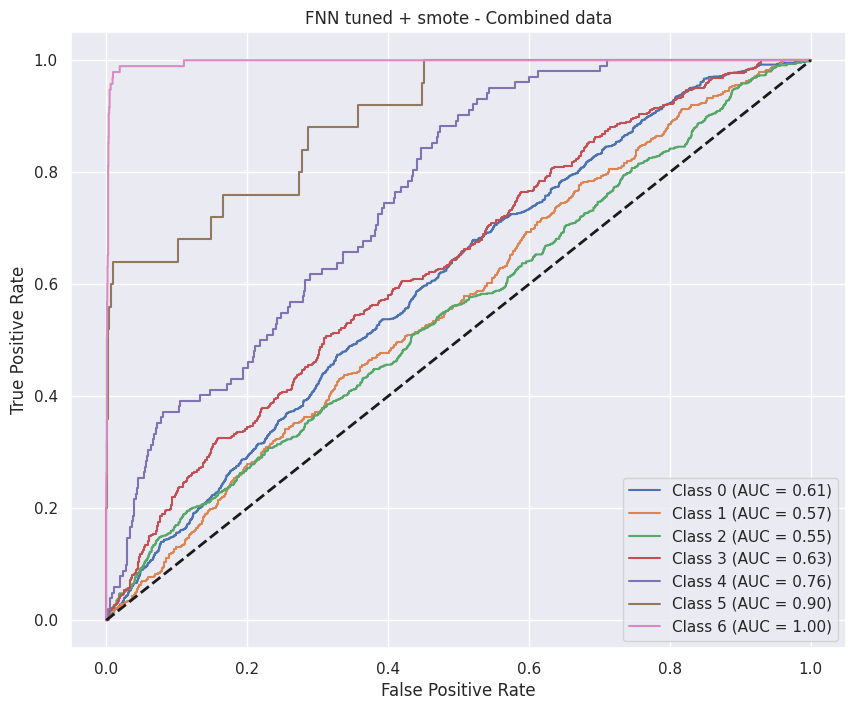

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 64)                4160      
                                                                 
 dense_151 (Dense)           (None, 32)                2080      
                                                                 
 dense_152 (Dense)           (None, 7)                 231       
                                                                 
Total params: 6471 (25.28 KB)
Trainable params: 6471 (25.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_test_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], predictions[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN tuned + smote - Combined data')
plt.legend(loc="lower right")
plt.show()

FNN_base.summary()

#FNN - XRAY

In [ ]:
FNN_base_Xray = tf.keras.models.load_model("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/FFN/FFN_Xray")
FNN_tuned_Xray = tf.keras.models.load_model("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/FFN/FFN_tuned_Xray")
FNN_tuned_smote_Xray = tf.keras.models.load_model("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/FFN/FFN_tuned_smote_Xray")

In [ ]:
predictions_Xray = FNN_base_Xray.predict(X_test_Xray)

predicted_labels_Xray = np.argmax(predictions_Xray, axis=1)

report_Xray = classification_report(y_test_Xray, predicted_labels_Xray)
print("Classification Report for Xray:\n", report_Xray)

roc_auc_Xray = roc_auc_score(y_test_Xray, predictions_Xray, multi_class="ovr")
print("ROC-AUC Score for Xray:", roc_auc_Xray)

FNN_base_Xray.summary()

104/104 [==============================] - 0s 2ms/step
Classification Report for Xray:
               precision    recall  f1-score   support

           0       0.43      0.42      0.43      1278
           1       0.20      0.19      0.19       592
           2       0.29      0.35      0.31       894
           3       0.21      0.19      0.20       446
           4       0.13      0.10      0.11       102

    accuracy                           0.32      3312
   macro avg       0.25      0.25      0.25      3312
weighted avg       0.31      0.32      0.31      3312

ROC-AUC Score for Xray: 0.5910448492788696
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                              

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, f1_score, roc_auc_score

predicted_labels = np.argmax(predictions_Xray, axis=1)

micro_f1 = f1_score(y_test_Xray, predicted_labels, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3155193236714976


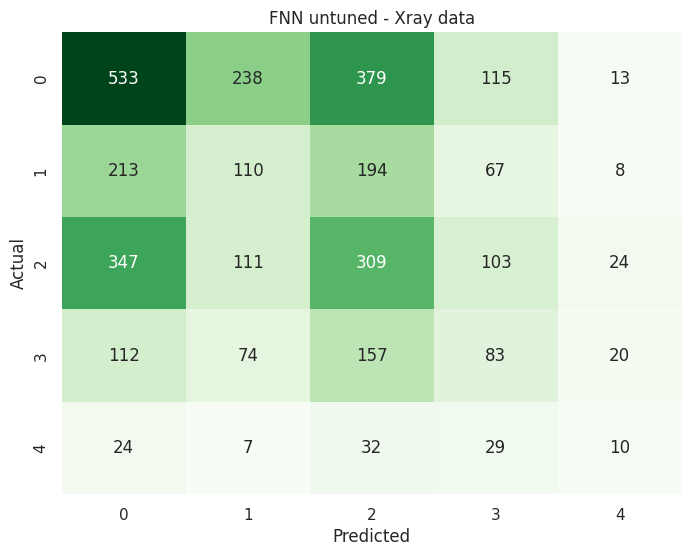

In [ ]:
conf_matrix_Xray = confusion_matrix(y_test_Xray, predicted_labels_Xray)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_Xray, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=np.unique(y_test_Xray), yticklabels=np.unique(y_test_Xray))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FNN untuned - Xray data')
plt.show()

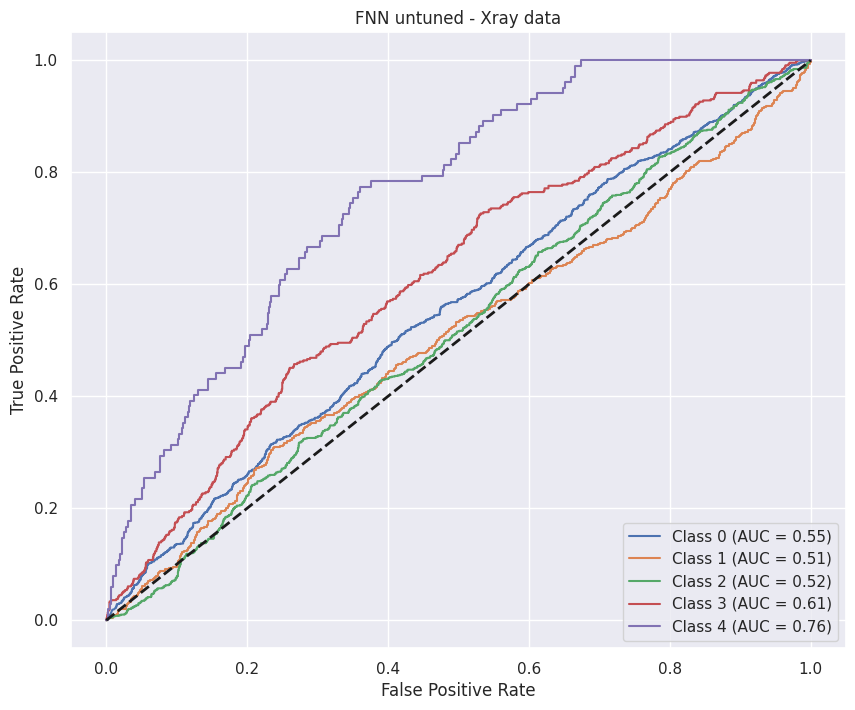

In [ ]:
n_classes_Xray = 5

y_test_binary_Xray = label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))

fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_class_Xray = dict()

for i in range(n_classes_Xray):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(y_test_binary_Xray[:, i], predictions_Xray[:, i])
    roc_auc_class_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(n_classes_Xray):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_class_Xray[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN untuned - Xray data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_Xray = FNN_tuned_Xray.predict(X_test_Xray)

predicted_labels_Xray = np.argmax(predictions_Xray, axis=1)

report_Xray = classification_report(y_test_Xray, predicted_labels_Xray)
print("Classification Report for Xray:\n", report_Xray)

roc_auc_Xray = roc_auc_score(y_test_Xray, predictions_Xray, multi_class="ovr")
print("ROC-AUC Score for Xray:", roc_auc_Xray)
FNN_tuned_Xray.summary()

104/104 [==============================] - 1s 6ms/step
Classification Report for Xray:
               precision    recall  f1-score   support

           0       0.45      0.59      0.51      1278
           1       0.21      0.11      0.14       592
           2       0.32      0.29      0.30       894
           3       0.25      0.26      0.26       446
           4       0.20      0.10      0.13       102

    accuracy                           0.36      3312
   macro avg       0.29      0.27      0.27      3312
weighted avg       0.34      0.36      0.34      3312

ROC-AUC Score for Xray: 0.6002712575246072
Model: "sequential_201"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1023 (Dense)          (None, 57)                3705      
                                                                 
 dense_1024 (Dense)          (None, 30)                1740      
                          

In [ ]:
predicted_labels = np.argmax(predictions_Xray, axis=1)

micro_f1 = f1_score(y_test_Xray, predicted_labels, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.36382850241545894


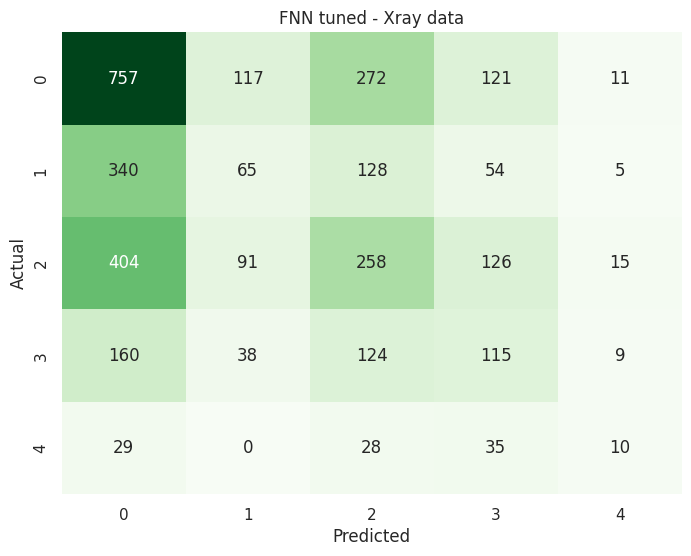

In [ ]:
conf_matrix_Xray = confusion_matrix(y_test_Xray, predicted_labels_Xray)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_Xray, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=np.unique(y_test_Xray), yticklabels=np.unique(y_test_Xray))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FNN tuned - Xray data')
plt.show()

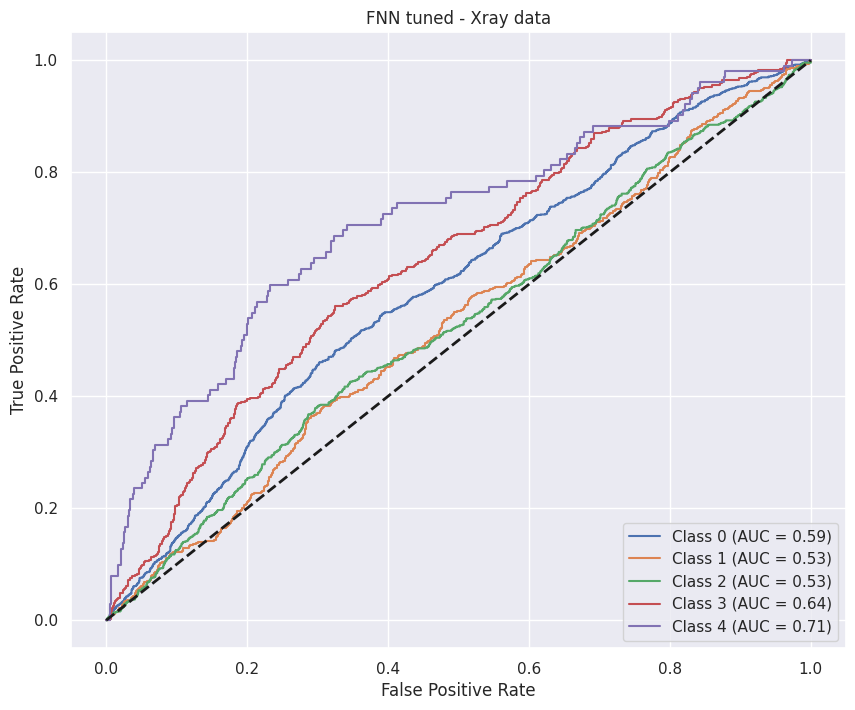

In [ ]:
fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_class_Xray = dict()

for i in range(n_classes_Xray):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(y_test_binary_Xray[:, i], predictions_Xray[:, i])
    roc_auc_class_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(n_classes_Xray):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_class_Xray[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN tuned - Xray data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_Xray = FNN_tuned_smote_Xray.predict(X_test_Xray)

predicted_labels_Xray = np.argmax(predictions_Xray, axis=1)

report_Xray = classification_report(y_test_Xray, predicted_labels_Xray)
print("Classification Report for Xray:\n", report_Xray)

roc_auc_Xray = roc_auc_score(y_test_Xray, predictions_Xray, multi_class="ovr")
print("ROC-AUC Score for Xray:", roc_auc_Xray)
FNN_tuned_smote_Xray.summary()

104/104 [==============================] - 1s 3ms/step
Classification Report for Xray:
               precision    recall  f1-score   support

           0       0.46      0.39      0.42      1278
           1       0.19      0.14      0.16       592
           2       0.31      0.41      0.35       894
           3       0.24      0.27      0.25       446
           4       0.09      0.10      0.09       102

    accuracy                           0.32      3312
   macro avg       0.26      0.26      0.26      3312
weighted avg       0.33      0.32      0.32      3312

ROC-AUC Score for Xray: 0.6127958428177124
Model: "sequential_404"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1796 (Dense)          (None, 193)               12545     
                                                                 
 dense_1797 (Dense)          (None, 91)                17654     
                          

In [ ]:
predicted_labels = np.argmax(predictions_Xray, axis=1)

micro_f1 = f1_score(y_test_Xray, predicted_labels, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.32367149758454106


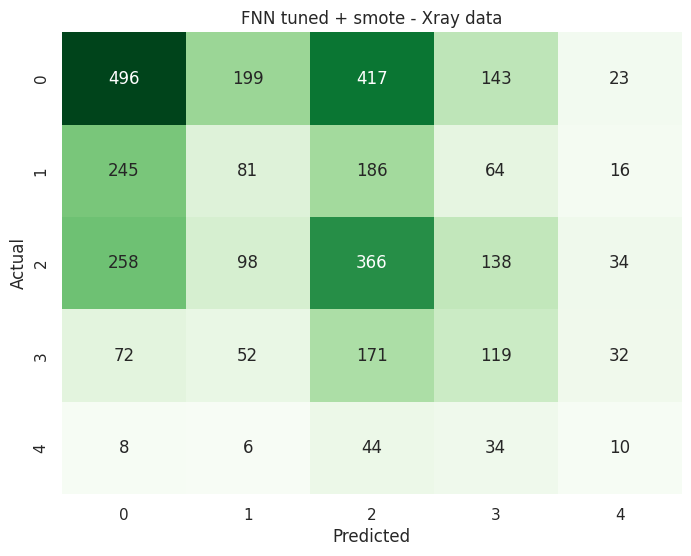

In [ ]:
conf_matrix_Xray = confusion_matrix(y_test_Xray, predicted_labels_Xray)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_Xray, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=np.unique(y_test_Xray), yticklabels=np.unique(y_test_Xray))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FNN tuned + smote - Xray data')
plt.show()

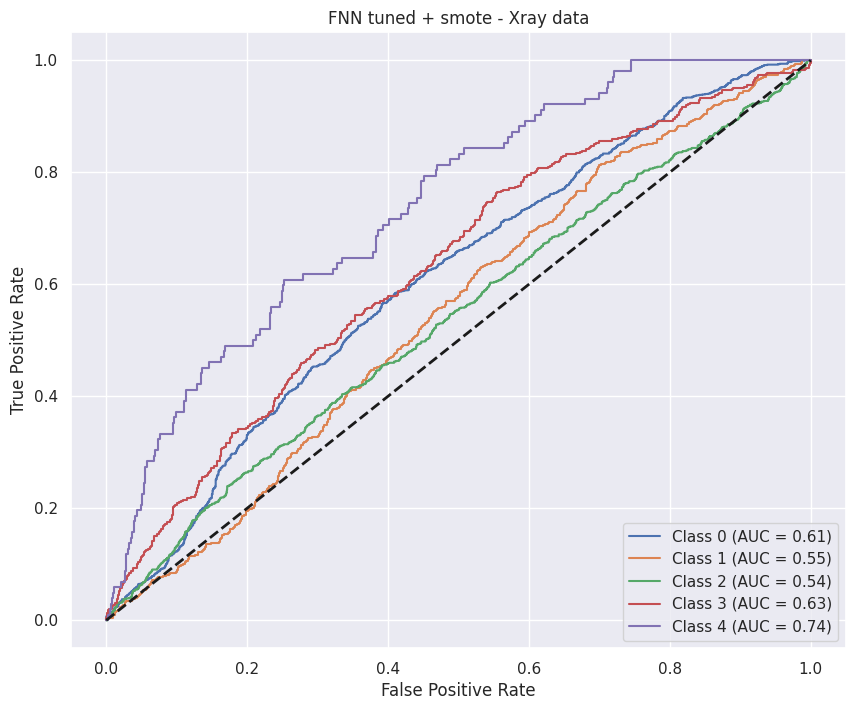

In [ ]:
fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_class_Xray = dict()

for i in range(n_classes_Xray):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(y_test_binary_Xray[:, i], predictions_Xray[:, i])
    roc_auc_class_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(n_classes_Xray):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_class_Xray[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN tuned + smote - Xray data')
plt.legend(loc="lower right")
plt.show()

# FNN - MRI

In [ ]:
FNN_base_MRI = tf.keras.models.load_model("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/FFN/FFN_MRI")
FNN_tuned_MRI = tf.keras.models.load_model("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/FFN/FFN_tuned_MRI")
FNN_tuned_smote_MRI = tf.keras.models.load_model("/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/FFN/FFN_tuned_smote_MRI")

In [ ]:
predictions_MRI = FNN_base_MRI.predict(X_test_MRI)

predicted_labels_MRI = np.round(predictions_MRI).astype(int)

report_MRI = classification_report(y_test_MRI, predicted_labels_MRI)
print("Classification Report for MRI:\n", report_MRI)

roc_auc_MRI = roc_auc_score(y_test_MRI, predictions_MRI)
print("ROC-AUC Score for MRI:", roc_auc_MRI)
FNN_base_MRI.summary()

4/4 [==============================] - 0s 5ms/step
Classification Report for MRI:
               precision    recall  f1-score   support

           0       0.63      0.48      0.55        25
           1       0.87      0.93      0.90        95

    accuracy                           0.83       120
   macro avg       0.75      0.70      0.72       120
weighted avg       0.82      0.83      0.82       120

ROC-AUC Score for MRI: 0.8332631578947369
Model: "sequential_406"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1802 (Dense)          (None, 128)               8320      
                                                                 
 dense_1803 (Dense)          (None, 64)                8256      
                                                                 
 dense_1804 (Dense)          (None, 1)                 65        
                                                              

In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predicted_labels_MRI, average='micro')

print("Micro F1 Score for MRI:", micro_f1_MRI)

Micro F1 Score for MRI: 0.8333333333333334


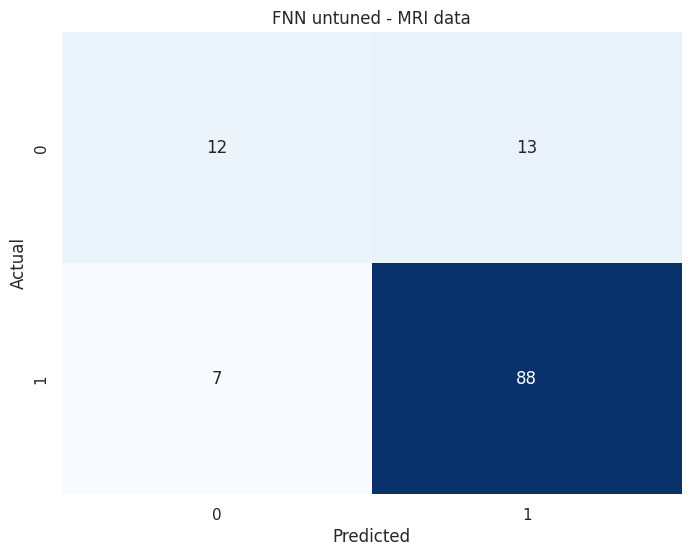

In [ ]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, predicted_labels_MRI)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_MRI), yticklabels=np.unique(y_test_MRI))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FNN untuned - MRI data')
plt.show()

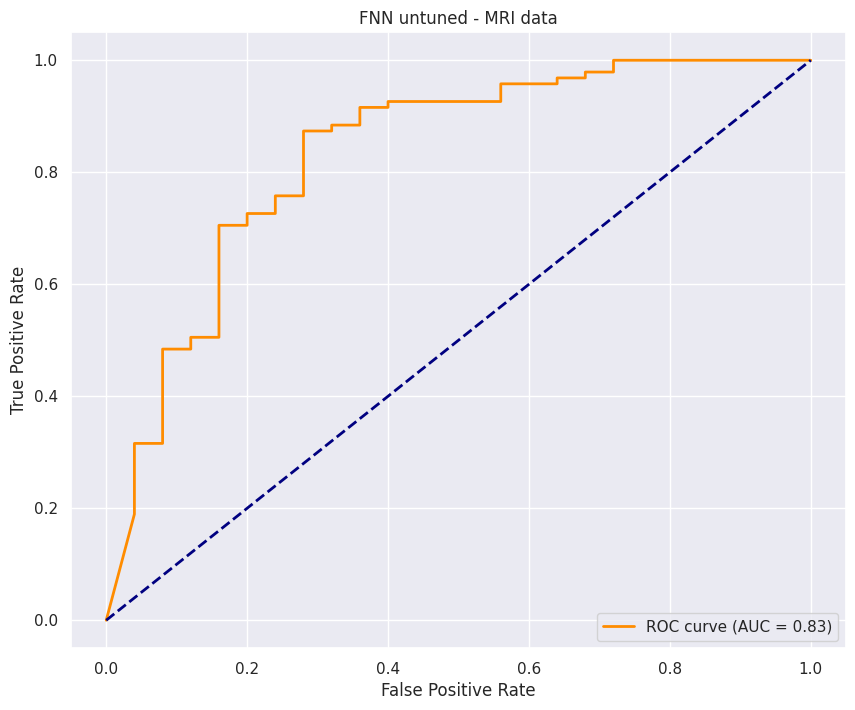

In [ ]:
fpr_MRI, tpr_MRI, _ = roc_curve(y_test_MRI, predictions_MRI)
roc_auc_MRI = auc(fpr_MRI, tpr_MRI)

plt.figure(figsize=(10, 8))
plt.plot(fpr_MRI, tpr_MRI, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_MRI:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN untuned - MRI data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_MRI = FNN_tuned_MRI.predict(X_test_MRI)

predicted_labels_MRI = np.round(predictions_MRI).astype(int)

report_MRI = classification_report(y_test_MRI, predicted_labels_MRI)
print("Classification Report for MRI:\n", report_MRI)

roc_auc_MRI = roc_auc_score(y_test_MRI, predictions_MRI)
print("ROC-AUC Score for MRI:", roc_auc_MRI)
FNN_tuned_MRI.summary()

4/4 [==============================] - 0s 4ms/step
Classification Report for MRI:
               precision    recall  f1-score   support

           0       0.91      0.40      0.56        25
           1       0.86      0.99      0.92        95

    accuracy                           0.87       120
   macro avg       0.89      0.69      0.74       120
weighted avg       0.87      0.87      0.85       120

ROC-AUC Score for MRI: 0.8071578947368421
Model: "sequential_607"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2681 (Dense)          (None, 108)               7020      
                                                                 
 dense_2682 (Dense)          (None, 128)               13952     
                                                                 
 dropout_1464 (Dropout)      (None, 128)               0         
                                                              

In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predicted_labels_MRI, average='micro')

print("Micro F1 Score for MRI:", micro_f1_MRI)

Micro F1 Score for MRI: 0.8666666666666667


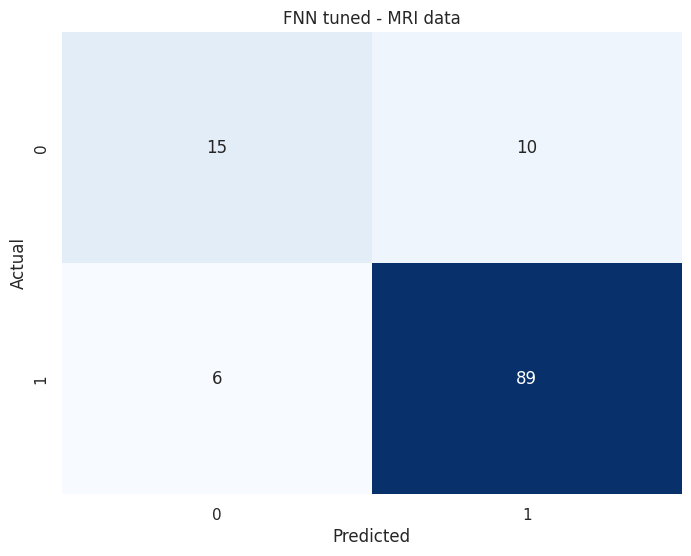

In [ ]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, predicted_labels_MRI)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_MRI), yticklabels=np.unique(y_test_MRI))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FNN tuned - MRI data')
plt.show()

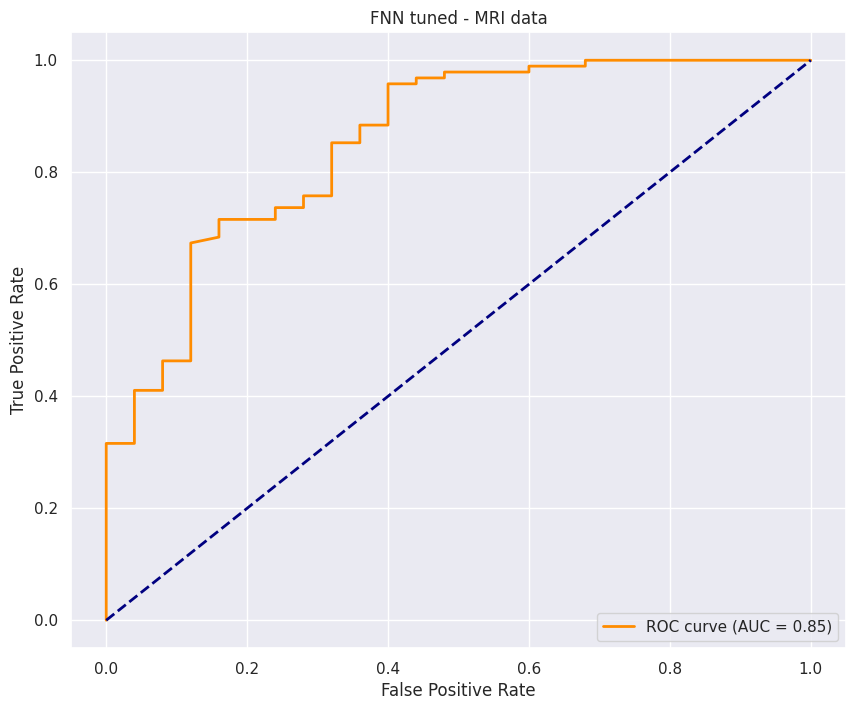

In [ ]:
fpr_MRI, tpr_MRI, _ = roc_curve(y_test_MRI, predictions_MRI)
roc_auc_MRI = auc(fpr_MRI, tpr_MRI)

plt.figure(figsize=(10, 8))
plt.plot(fpr_MRI, tpr_MRI, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_MRI:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN tuned - MRI data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_MRI = FNN_tuned_smote_MRI.predict(X_test_MRI)

predicted_labels_MRI = np.round(predictions_MRI).astype(int)

report_MRI = classification_report(y_test_MRI, predicted_labels_MRI)
print("Classification Report for MRI:\n", report_MRI)

roc_auc_MRI = roc_auc_score(y_test_MRI, predictions_MRI)
print("ROC-AUC Score for MRI:", roc_auc_MRI)
FNN_tuned_smote_MRI.summary()

4/4 [==============================] - 0s 22ms/step
Classification Report for MRI:
               precision    recall  f1-score   support

           0       0.71      0.60      0.65        25
           1       0.90      0.94      0.92        95

    accuracy                           0.87       120
   macro avg       0.81      0.77      0.78       120
weighted avg       0.86      0.87      0.86       120

ROC-AUC Score for MRI: 0.8549473684210527
Model: "sequential_808"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4377 (Dense)          (None, 113)               7345      
                                                                 
 dense_4378 (Dense)          (None, 96)                10944     
                                                                 
 dropout_2758 (Dropout)      (None, 96)                0         
                                                             

In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predicted_labels_MRI, average='micro')

print("Micro F1 Score for MRI:", micro_f1_MRI)

Micro F1 Score for MRI: 0.8666666666666667


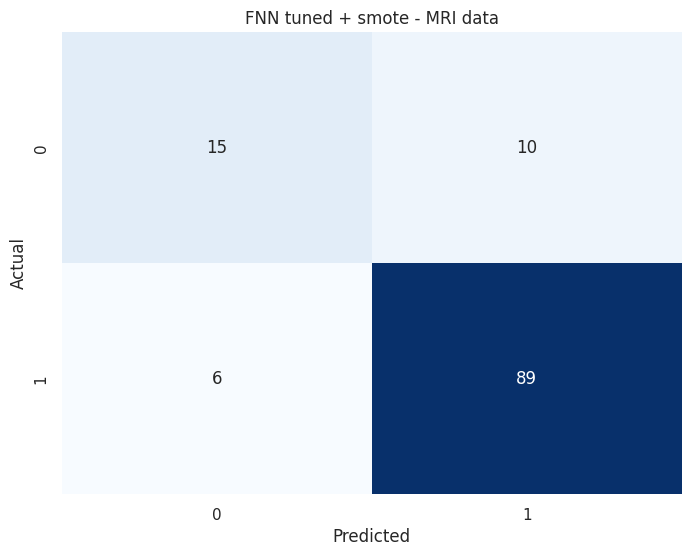

In [ ]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, predicted_labels_MRI)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_MRI), yticklabels=np.unique(y_test_MRI))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FNN tuned + smote - MRI data')
plt.show()

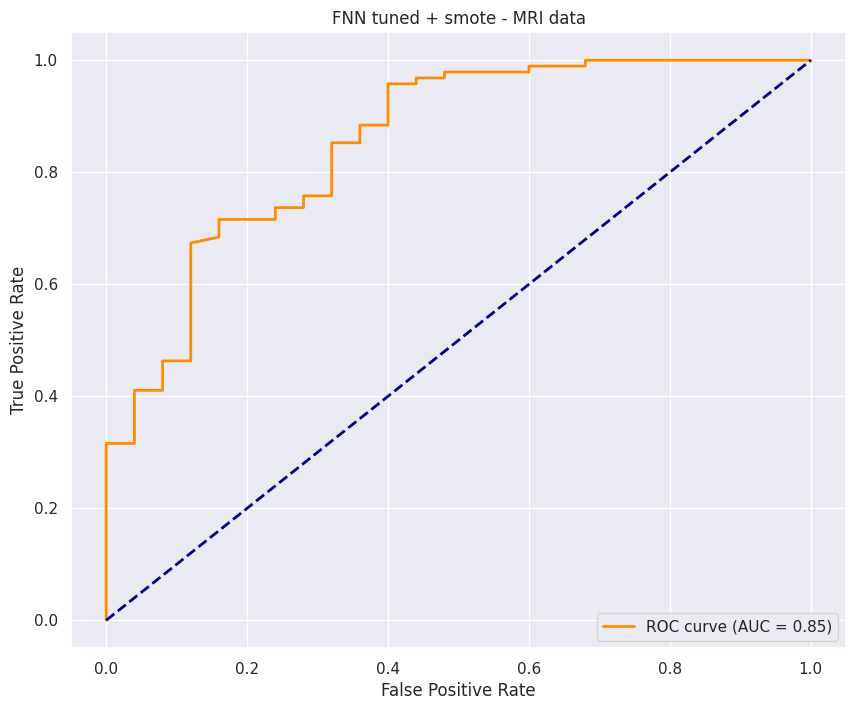

In [ ]:
fpr_MRI, tpr_MRI, _ = roc_curve(y_test_MRI, predictions_MRI)
roc_auc_MRI = auc(fpr_MRI, tpr_MRI)

plt.figure(figsize=(10, 8))
plt.plot(fpr_MRI, tpr_MRI, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_MRI:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN tuned + smote - MRI data')
plt.legend(loc="lower right")
plt.show()

# ==============================================================================

# XGBoost - COMBINED

In [ ]:
XGBoost_base = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/XGBoost/XGBoost.joblib')
XGBoost_tuned = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/XGBoost/XGBoost_tuned.joblib')
XGBoost_tuned_smote = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/XGBoost/XGBoost_tuned_smote.joblib')

In [ ]:
predictions = XGBoost_base.predict(X_test_combined)

report = classification_report(y_test_combined, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_combined, XGBoost_base.predict_proba(X_test_combined), multi_class="ovr")
print("ROC-AUC Score:", roc_auc)

print(XGBoost_base.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.69      0.52      1278
           1       0.19      0.06      0.09       592
           2       0.29      0.28      0.28       894
           3       0.23      0.08      0.12       446
           4       0.33      0.01      0.02       102
           5       1.00      0.20      0.33        25
           6       0.83      1.00      0.90        95

    accuracy                           0.38      3432
   macro avg       0.47      0.33      0.32      3432
weighted avg       0.33      0.38      0.33      3432

ROC-AUC Score: 0.7319650496909441
{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type

In [ ]:
micro_f1 = f1_score(y_test_combined, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3793706293706294


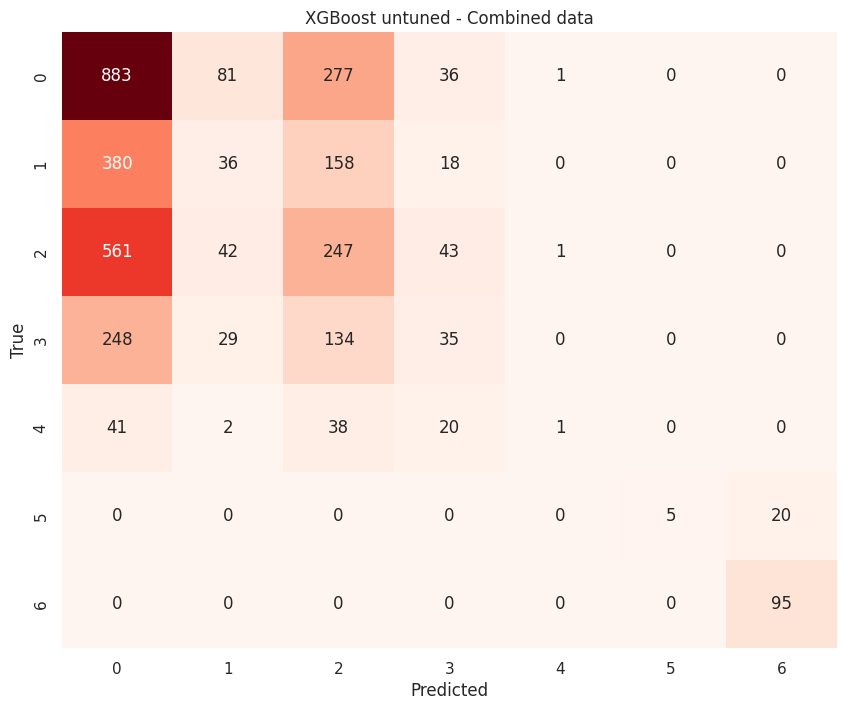

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost untuned - Combined data')
plt.show()

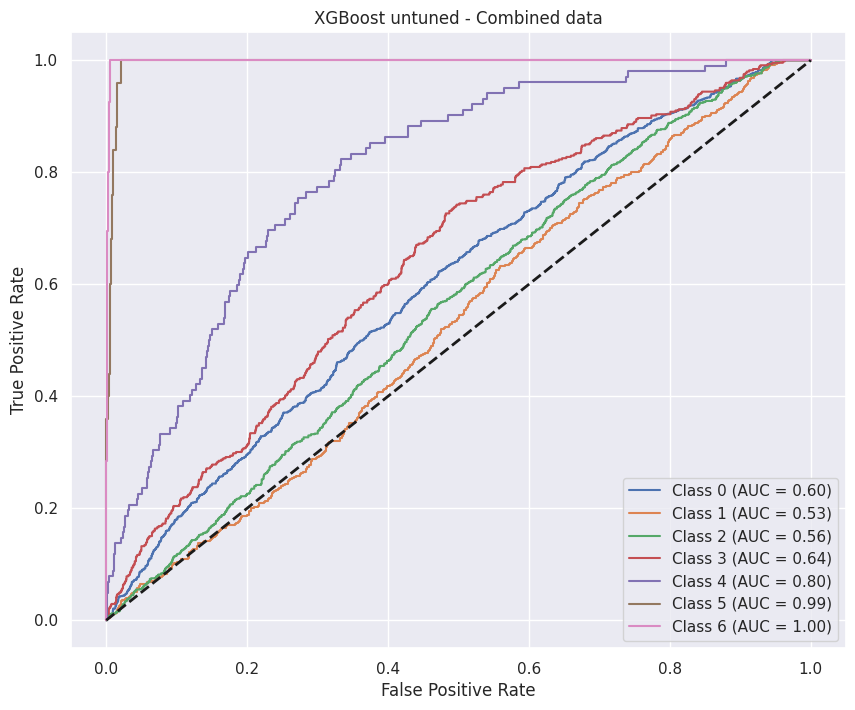

In [ ]:
y_test_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

fpr = dict()
tpr = dict()
roc_auc_class = dict()

probas = XGBoost_base.predict_proba(X_test_combined)

for i in range(XGBoost_base.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], probas[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(XGBoost_base.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost untuned - Combined data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = XGBoost_tuned.predict(X_test_combined)

report = classification_report(y_test_combined, predictions)
print("Classification Report:\n", report)


roc_auc = roc_auc_score(y_test_combined, XGBoost_tuned.predict_proba(X_test_combined), multi_class="ovr")
print("ROC-AUC Score:", roc_auc)

print(XGBoost_tuned.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.70      0.53      1278
           1       0.15      0.04      0.06       592
           2       0.31      0.31      0.31       894
           3       0.30      0.09      0.14       446
           4       0.67      0.02      0.04       102
           5       0.86      0.24      0.38        25
           6       0.83      0.99      0.90        95

    accuracy                           0.39      3432
   macro avg       0.50      0.34      0.34      3432
weighted avg       0.35      0.39      0.33      3432

ROC-AUC Score: 0.7416806165584047
{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.585265930419564, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.2443341831743769, 'grow_policy': N

In [ ]:
micro_f1 = f1_score(y_test_combined, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3892773892773892


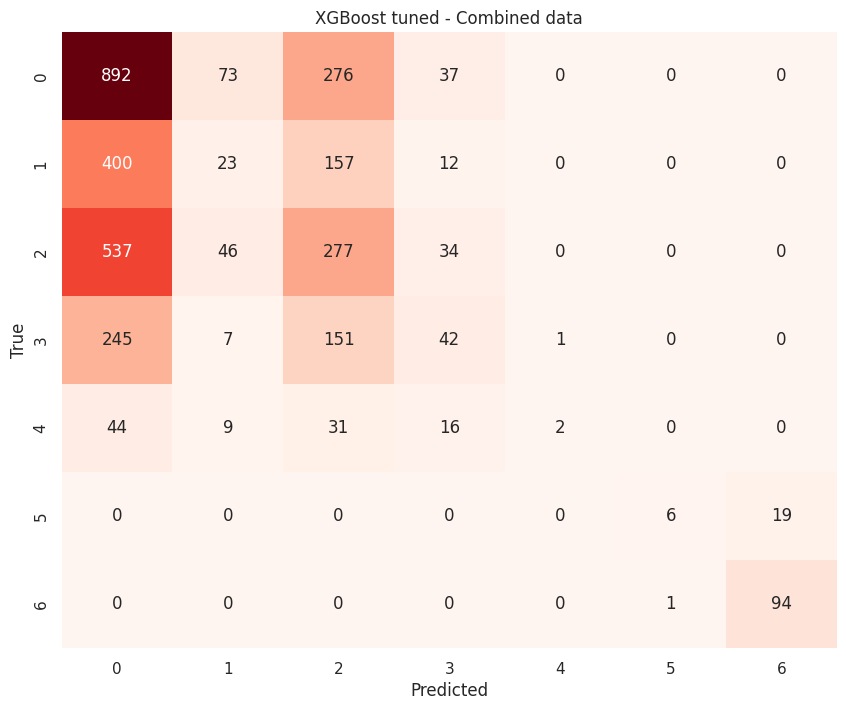

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost tuned - Combined data')
plt.show()

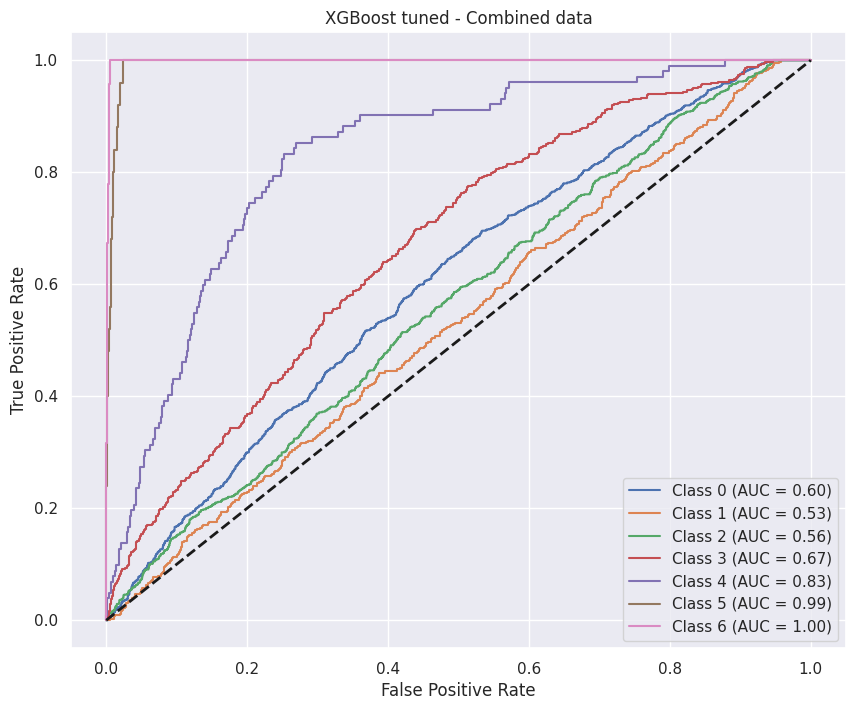

In [ ]:
y_test_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

fpr = dict()
tpr = dict()
roc_auc_class = dict()

probas = XGBoost_tuned.predict_proba(X_test_combined)

for i in range(XGBoost_tuned.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], probas[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(XGBoost_tuned.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost tuned - Combined data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = XGBoost_tuned_smote.predict(X_test_combined)

report = classification_report(y_test_combined, predictions)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_combined, XGBoost_tuned_smote.predict_proba(X_test_combined), multi_class="ovr")
print("ROC-AUC Score:", roc_auc)

print(XGBoost_tuned_smote.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.42      0.44      1278
           1       0.18      0.18      0.18       592
           2       0.31      0.32      0.32       894
           3       0.19      0.19      0.19       446
           4       0.10      0.17      0.13       102
           5       0.71      0.40      0.51        25
           6       0.86      0.96      0.91        95

    accuracy                           0.33      3432
   macro avg       0.40      0.38      0.38      3432
weighted avg       0.34      0.33      0.34      3432

ROC-AUC Score: 0.7323635443672726
{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8795849280754783, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.8588969261033704, 'grow_policy': 

In [ ]:
micro_f1 = f1_score(y_test_combined, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3324592074592075


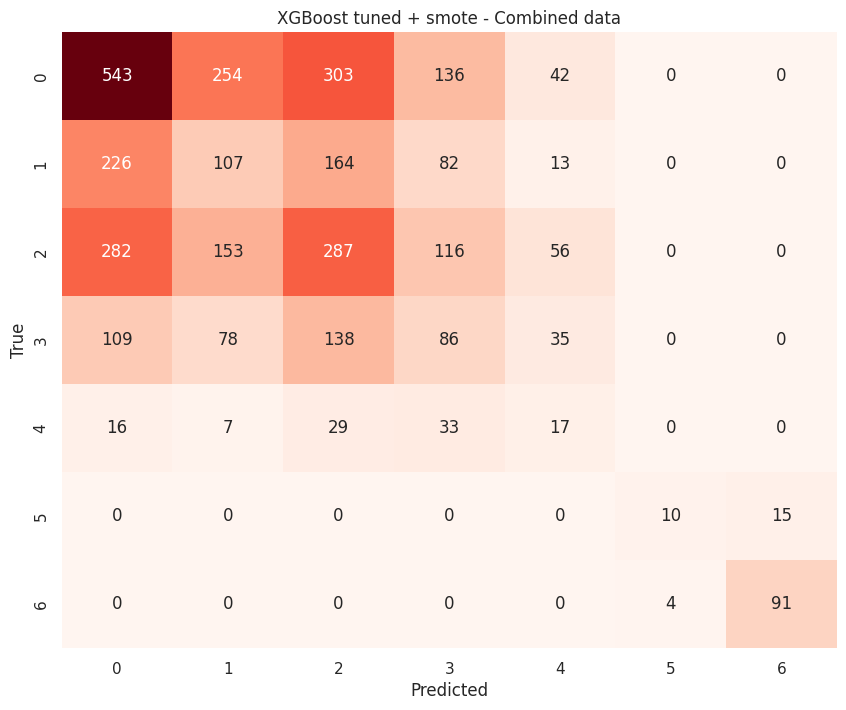

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost tuned + smote - Combined data')
plt.show()

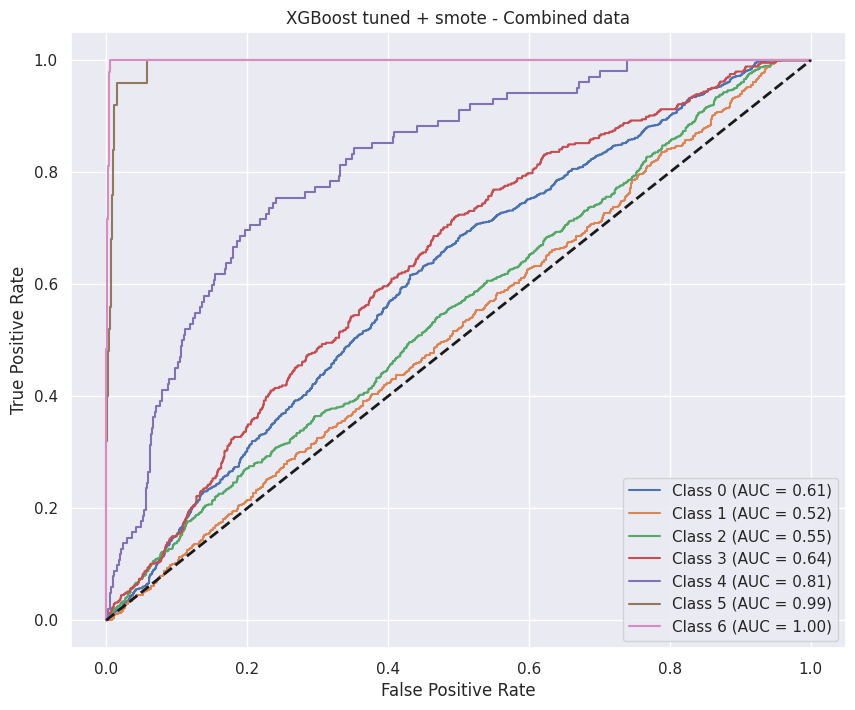

In [ ]:
y_test_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

fpr = dict()
tpr = dict()
roc_auc_class = dict()

probas = XGBoost_tuned_smote.predict_proba(X_test_combined)

for i in range(XGBoost_tuned_smote.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], probas[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(XGBoost_tuned_smote.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost tuned + smote - Combined data')
plt.legend(loc="lower right")
plt.show()

# XGBoost - XRAY

In [ ]:
XGBoost_base_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/XGBoost/XGBoost_Xray.joblib')
XGBoost_tuned_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/XGBoost/XGBoost_tuned_Xray.joblib')
XGBoost_tuned_smote_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/XGBoost/XGBoost_tuned_smote_Xray.joblib')

In [ ]:
predictions_Xray = XGBoost_base_Xray.predict(X_test_Xray)

report_Xray = classification_report(y_test_Xray, predictions_Xray)
print("Classification Report:\n", report_Xray)

roc_auc_Xray = roc_auc_score(y_test_Xray, XGBoost_base_Xray.predict_proba(X_test_Xray), multi_class="ovr")
print("ROC-AUC Score:", roc_auc_Xray)

print(XGBoost_base_Xray.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.69      0.52      1278
           1       0.17      0.06      0.09       592
           2       0.31      0.30      0.31       894
           3       0.27      0.08      0.13       446
           4       0.00      0.00      0.00       102

    accuracy                           0.37      3312
   macro avg       0.23      0.23      0.21      3312
weighted avg       0.31      0.37      0.32      3312

ROC-AUC Score: 0.6129707399871648
{'objective': 'multi:softmax', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 

In [ ]:
micro_f1_Xray = f1_score(y_test_Xray, predictions_Xray, average='micro')

print("Micro F1 Score:", micro_f1_Xray)

Micro F1 Score: 0.36926328502415456


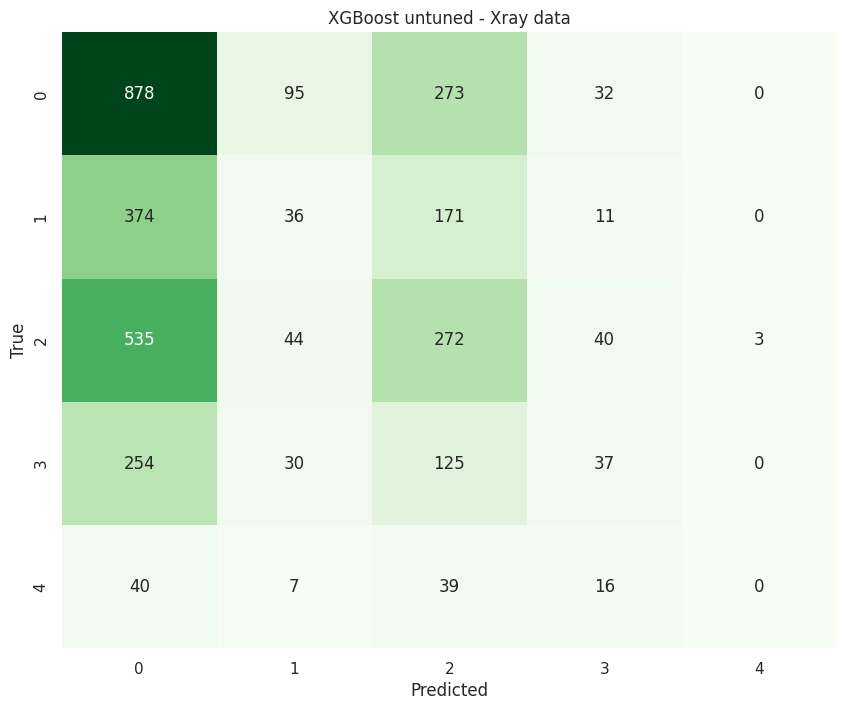

In [ ]:
conf_matrix_Xray = confusion_matrix(y_test_Xray, predictions_Xray)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_Xray, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost untuned - Xray data')
plt.show()

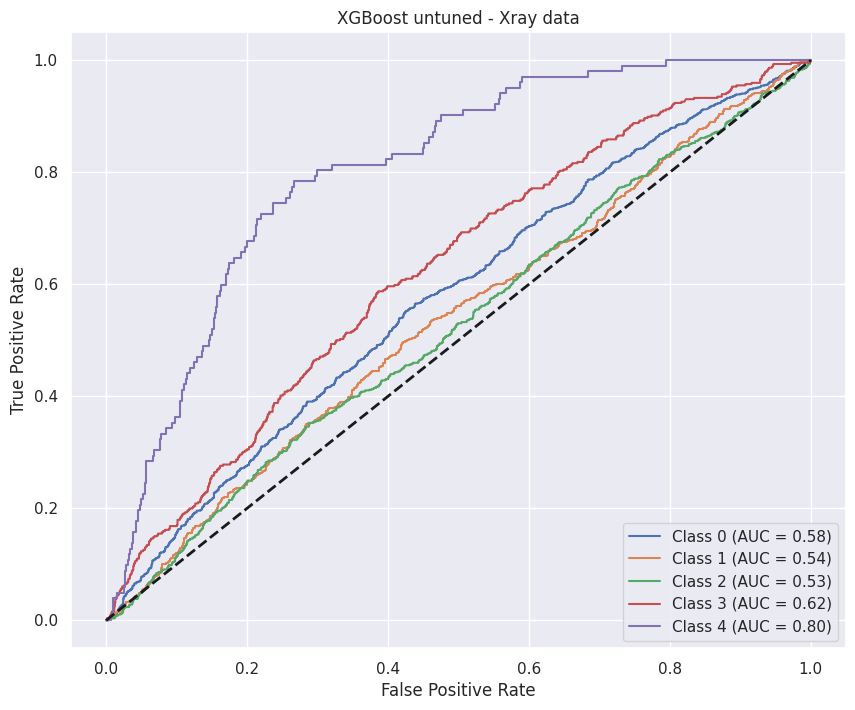

In [ ]:
y_test_binary_Xray = label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))

fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_class_Xray = dict()

probas_Xray = XGBoost_base_Xray.predict_proba(X_test_Xray)

for i in range(XGBoost_base_Xray.classes_.shape[0]):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(y_test_binary_Xray[:, i], probas_Xray[:, i])
    roc_auc_class_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(XGBoost_base_Xray.classes_.shape[0]):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_class_Xray[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost untuned - Xray data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_Xray = XGBoost_tuned_Xray.predict(X_test_Xray)

report_Xray = classification_report(y_test_Xray, predictions_Xray)
print("Classification Report:\n", report_Xray)

roc_auc_Xray = roc_auc_score(y_test_Xray, XGBoost_tuned_Xray.predict_proba(X_test_Xray), multi_class="ovr")
print("ROC-AUC Score:", roc_auc_Xray)

print(XGBoost_tuned_Xray.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.69      0.52      1278
           1       0.17      0.06      0.09       592
           2       0.31      0.30      0.31       894
           3       0.27      0.08      0.13       446
           4       0.00      0.00      0.00       102

    accuracy                           0.37      3312
   macro avg       0.23      0.23      0.21      3312
weighted avg       0.31      0.37      0.32      3312

ROC-AUC Score: 0.6129707399871648
{'objective': 'multi:softmax', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 

In [ ]:
micro_f1_Xray = f1_score(y_test_Xray, predictions_Xray, average='micro')

print("Micro F1 Score:", micro_f1_Xray)

Micro F1 Score: 0.36926328502415456


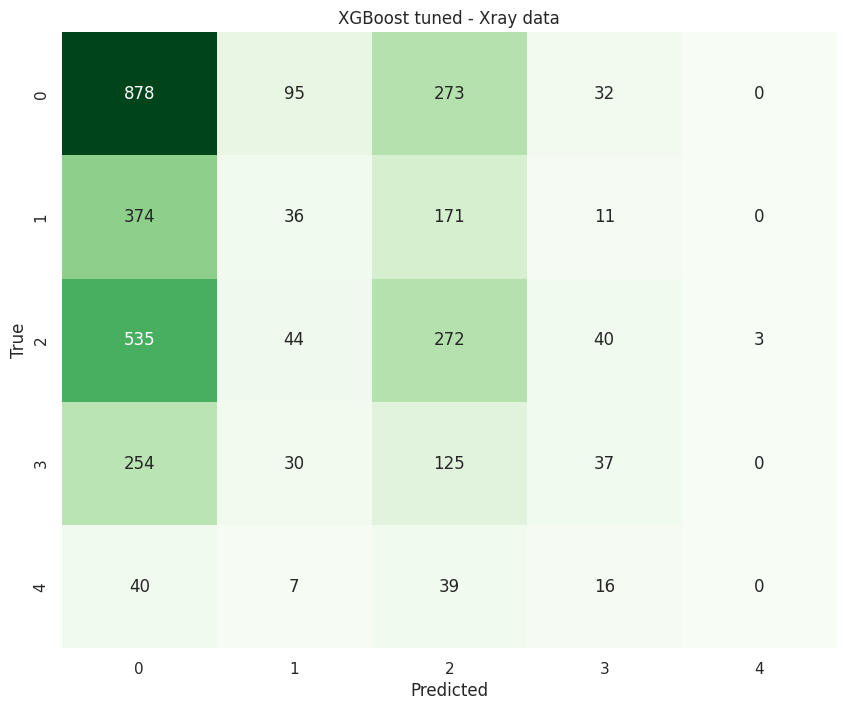

In [ ]:
conf_matrix_Xray = confusion_matrix(y_test_Xray, predictions_Xray)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_Xray, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost tuned - Xray data')
plt.show()

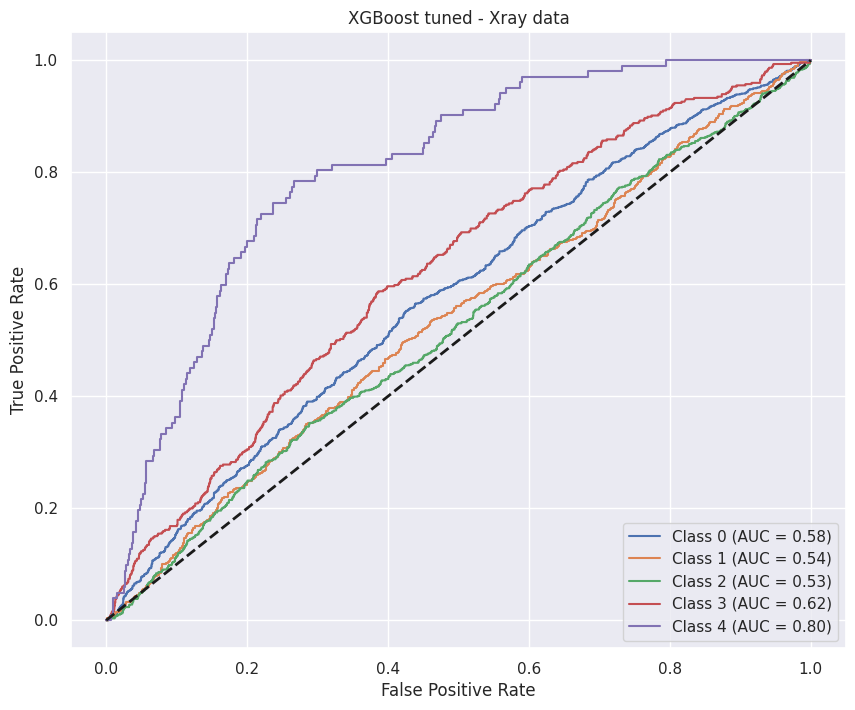

In [ ]:
y_test_binary_Xray = label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))

fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_class_Xray = dict()

probas_Xray = XGBoost_tuned_Xray.predict_proba(X_test_Xray)

for i in range(XGBoost_tuned_Xray.classes_.shape[0]):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(y_test_binary_Xray[:, i], probas_Xray[:, i])
    roc_auc_class_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(XGBoost_tuned_Xray.classes_.shape[0]):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_class_Xray[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost tuned - Xray data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_Xray = XGBoost_tuned_smote_Xray.predict(X_test_Xray)

report_Xray = classification_report(y_test_Xray, predictions_Xray)
print("Classification Report:\n", report_Xray)

roc_auc_Xray = roc_auc_score(y_test_Xray, XGBoost_tuned_smote_Xray.predict_proba(X_test_Xray), multi_class="ovr")
print("ROC-AUC Score:", roc_auc_Xray)

print(XGBoost_tuned_smote_Xray.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.39      0.42      1278
           1       0.19      0.20      0.20       592
           2       0.28      0.32      0.30       894
           3       0.20      0.22      0.21       446
           4       0.13      0.12      0.12       102

    accuracy                           0.30      3312
   macro avg       0.25      0.25      0.25      3312
weighted avg       0.31      0.30      0.31      3312

ROC-AUC Score: 0.6121155670833592
{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.789389520985637, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.21086547894759722, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.29529346665641126, 'max_b

In [ ]:
micro_f1_Xray = f1_score(y_test_Xray, predictions_Xray, average='micro')

print("Micro F1 Score:", micro_f1_Xray)

Micro F1 Score: 0.30495169082125606


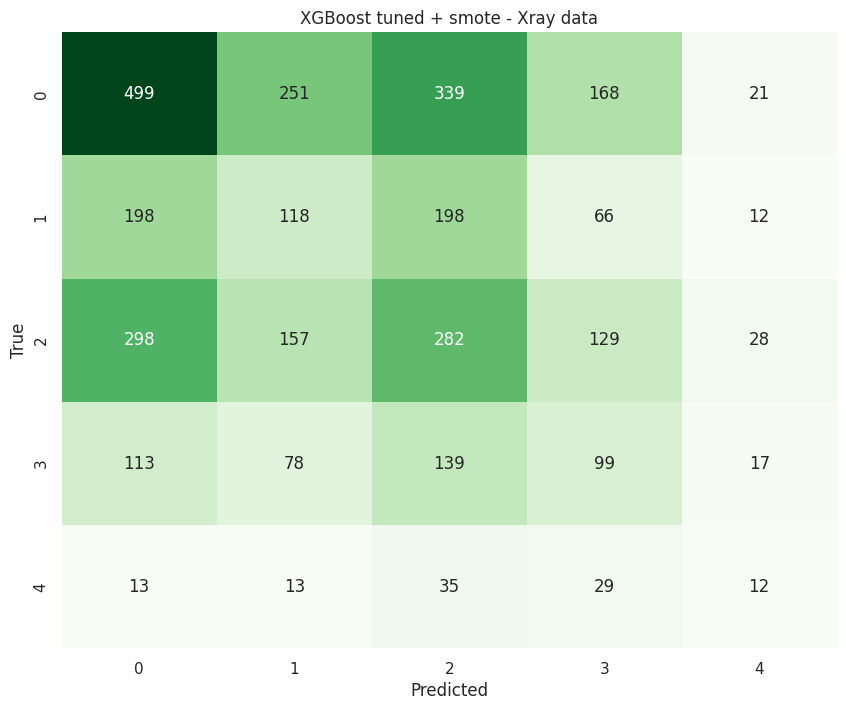

In [ ]:
conf_matrix_Xray = confusion_matrix(y_test_Xray, predictions_Xray)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_Xray, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost tuned + smote - Xray data')
plt.show()

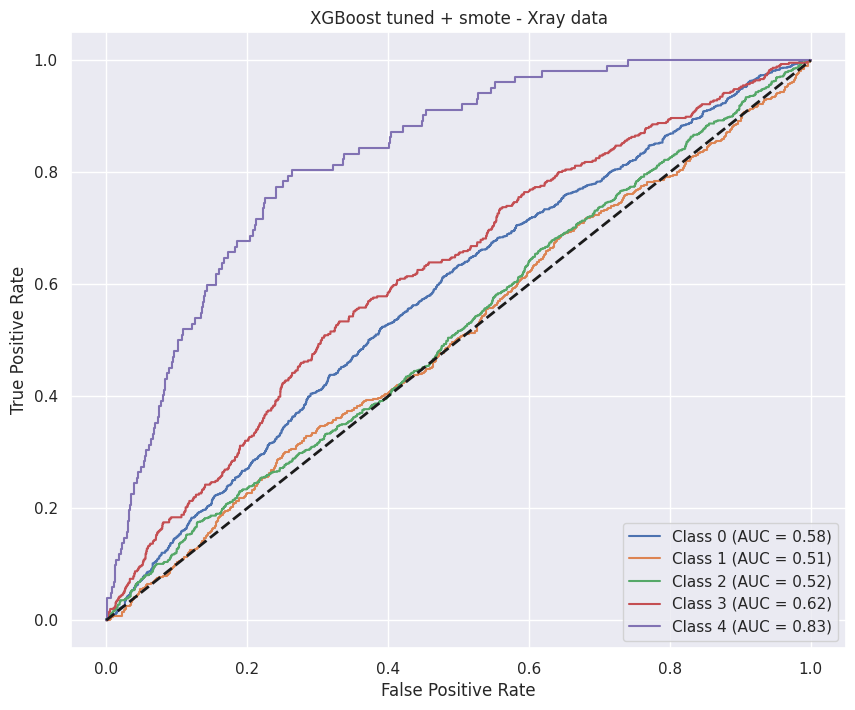

In [ ]:
y_test_binary_Xray = label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))

fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_class_Xray = dict()

probas_Xray = XGBoost_tuned_smote_Xray.predict_proba(X_test_Xray)

for i in range(XGBoost_tuned_smote_Xray.classes_.shape[0]):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(y_test_binary_Xray[:, i], probas_Xray[:, i])
    roc_auc_class_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(XGBoost_tuned_smote_Xray.classes_.shape[0]):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_class_Xray[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost tuned + smote - Xray data')
plt.legend(loc="lower right")
plt.show()

#XGBoost - MRI

In [ ]:
XGBoost_base_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/XGBoost/XGBoost_MRI.joblib')
XGBoost_tuned_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/XGBoost/XGBoost_tuned_MRI.joblib')
XGBoost_tuned_smote_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/XGBoost/XGBoost_tuned_smote_MRI.joblib')

In [ ]:
print(XGBoost_tuned_smote_MRI.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6572393417295967, 'device': None, 'early_stopping_rounds': 15, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 0.6326271796493103, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.25545245542834194, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 9, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 822, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.759875003410074, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'alpha': 0.858781117558633, 'lambda': 0.95995833

In [ ]:
predictions_MRI = XGBoost_base_MRI.predict(X_test_MRI)

report_MRI = classification_report(y_test_MRI, predictions_MRI)
print("Classification Report:\n", report_MRI)

roc_auc_MRI = roc_auc_score(y_test_MRI, XGBoost_base_MRI.predict_proba(X_test_MRI)[:, 1])
print("ROC-AUC Score:", roc_auc_MRI)

print(XGBoost_base_MRI.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.20      0.32        25
           1       0.82      0.99      0.90        95

    accuracy                           0.82       120
   macro avg       0.83      0.59      0.61       120
weighted avg       0.83      0.82      0.78       120

ROC-AUC Score: 0.7983157894736842
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None,

In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predictions_MRI, average='micro')

print("Micro F1 Score for MRI:", micro_f1_MRI)

Micro F1 Score for MRI: 0.825


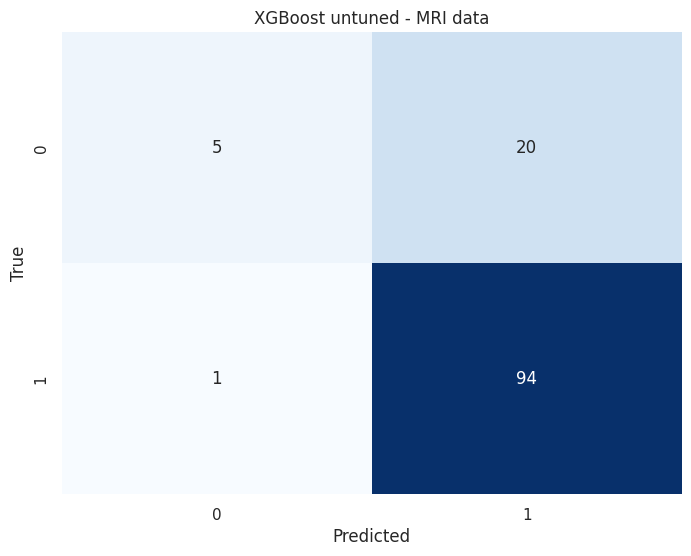

In [ ]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, predictions_MRI)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost untuned - MRI data')
plt.show()

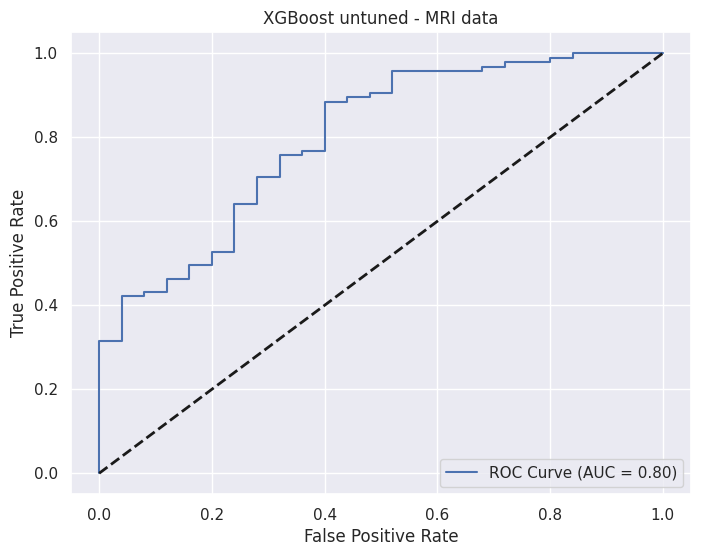

In [ ]:
predictions_MRI = XGBoost_base_MRI.predict_proba(X_test_MRI)[:, 1]

fpr, tpr, _ = roc_curve(y_test_MRI, predictions_MRI)

roc_auc_MRI = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_MRI:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost untuned - MRI data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_MRI = XGBoost_tuned_MRI.predict(X_test_MRI)

report_MRI = classification_report(y_test_MRI, predictions_MRI)
print("Classification Report:\n", report_MRI)

roc_auc_MRI = roc_auc_score(y_test_MRI, XGBoost_tuned_MRI.predict_proba(X_test_MRI)[:, 1])
print("ROC-AUC Score:", roc_auc_MRI)

print(XGBoost_tuned_MRI.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120

ROC-AUC Score: 0.7166315789473685
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9230381082194565, 'device': None, 'early_stopping_rounds': 15, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 0.682209516776825, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.14283068325557272, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 14, 'max_leaves': None, 'min_child_weight': 1, 'missing':

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predictions_MRI, average='micro')

print("Micro F1 Score for MRI:", micro_f1_MRI)

Micro F1 Score for MRI: 0.7916666666666666


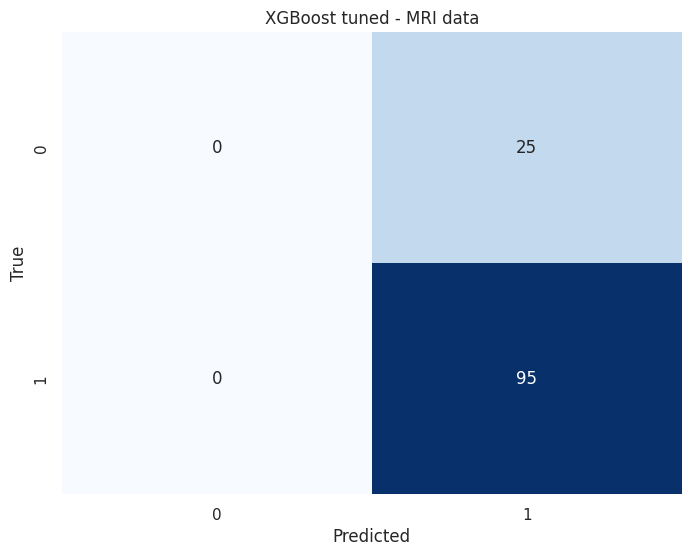

In [ ]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, predictions_MRI)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost tuned - MRI data')
plt.show()

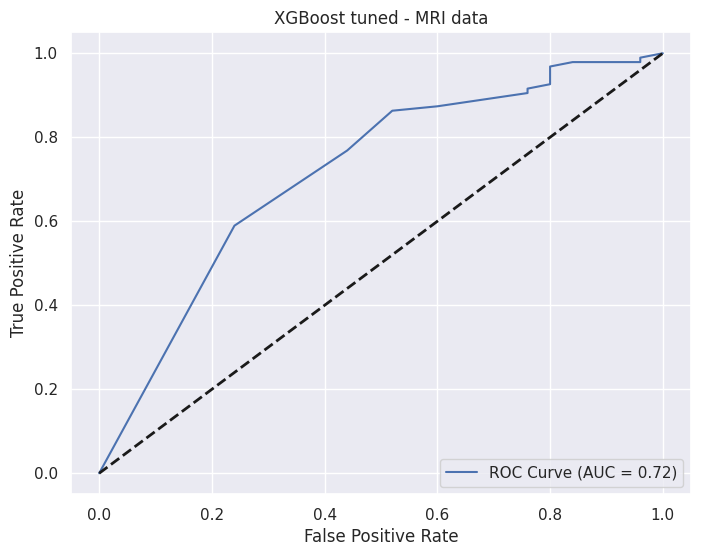

In [ ]:
predictions_MRI = XGBoost_tuned_MRI.predict_proba(X_test_MRI)[:, 1]

fpr, tpr, _ = roc_curve(y_test_MRI, predictions_MRI)

roc_auc_MRI = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_MRI:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost tuned - MRI data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_MRI = XGBoost_tuned_smote_MRI.predict(X_test_MRI)

report_MRI = classification_report(y_test_MRI, predictions_MRI)
print("Classification Report:\n", report_MRI)

roc_auc_MRI = roc_auc_score(y_test_MRI, XGBoost_tuned_smote_MRI.predict_proba(X_test_MRI)[:, 1])
print("ROC-AUC Score:", roc_auc_MRI)

print(XGBoost_tuned_smote_MRI.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.48      0.47        25
           1       0.86      0.85      0.86        95

    accuracy                           0.78       120
   macro avg       0.66      0.67      0.66       120
weighted avg       0.78      0.78      0.78       120

ROC-AUC Score: 0.8042105263157895
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6572393417295967, 'device': None, 'early_stopping_rounds': 15, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 0.6326271796493103, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.25545245542834194, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 9, 'missing':

In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predictions_MRI, average='micro')

print("Micro F1 Score for MRI:", micro_f1_MRI)

Micro F1 Score for MRI: 0.775


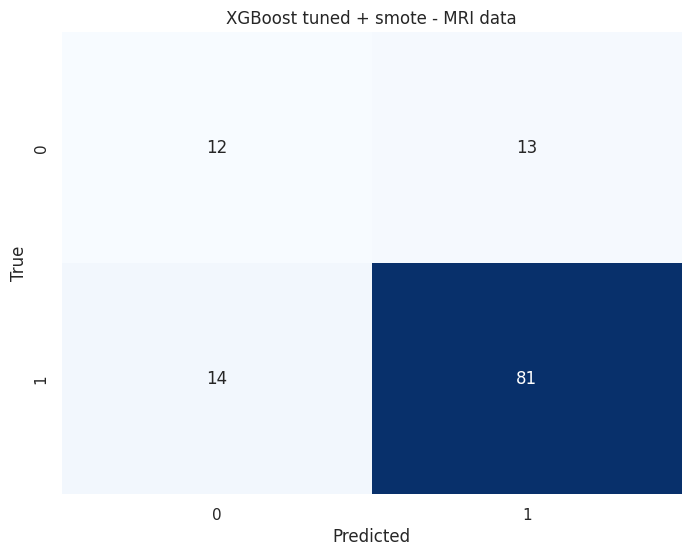

In [ ]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, predictions_MRI)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost tuned + smote - MRI data')
plt.show()

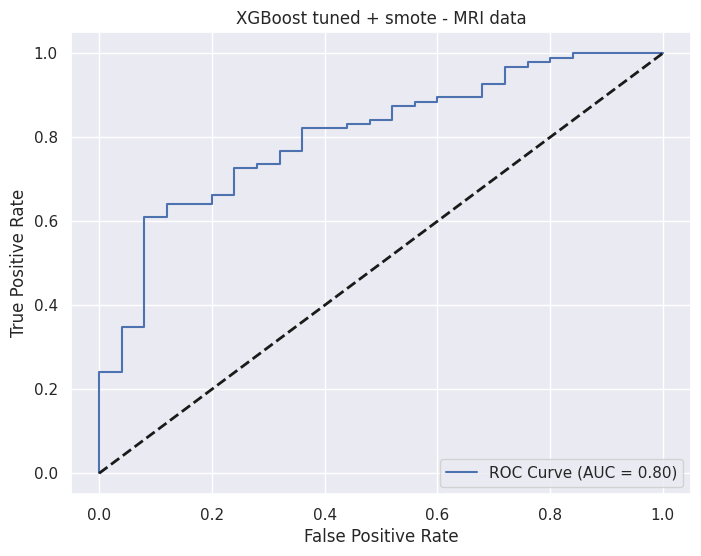

In [ ]:
predictions_MRI = XGBoost_tuned_smote_MRI.predict_proba(X_test_MRI)[:, 1]

fpr, tpr, _ = roc_curve(y_test_MRI, predictions_MRI)

roc_auc_MRI = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_MRI:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost tuned + smote - MRI data')
plt.legend(loc="lower right")
plt.show()

# =============================================================================

#Random Forest - Combined

In [ ]:
RF_base = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Random Forest/random_forest_model.joblib')
RF_tuned = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Random Forest/random_forest_model_tuned.joblib')
RF_tuned_smote = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Random Forest/random_forest_model_tuned_smote.joblib')

In [ ]:
predictions_combined = RF_base.predict(X_test_combined)

report_combined = classification_report(y_test_combined, predictions_combined)
print("Classification Report:\n", report_combined)

roc_auc_combined = roc_auc_score(y_test_combined, RF_base.predict_proba(X_test_combined), multi_class="ovr")
print("ROC-AUC Score:", roc_auc_combined)

print(RF_base.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.86      0.54      1278
           1       0.09      0.01      0.01       592
           2       0.26      0.15      0.19       894
           3       0.48      0.03      0.05       446
           4       0.00      0.00      0.00       102
           5       0.00      0.00      0.00        25
           6       0.79      1.00      0.88        95

    accuracy                           0.39      3432
   macro avg       0.29      0.29      0.24      3432
weighted avg       0.32      0.39      0.29      3432

ROC-AUC Score: 0.710900282777167
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_st

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
micro_f1 = f1_score(y_test_combined, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3324592074592075


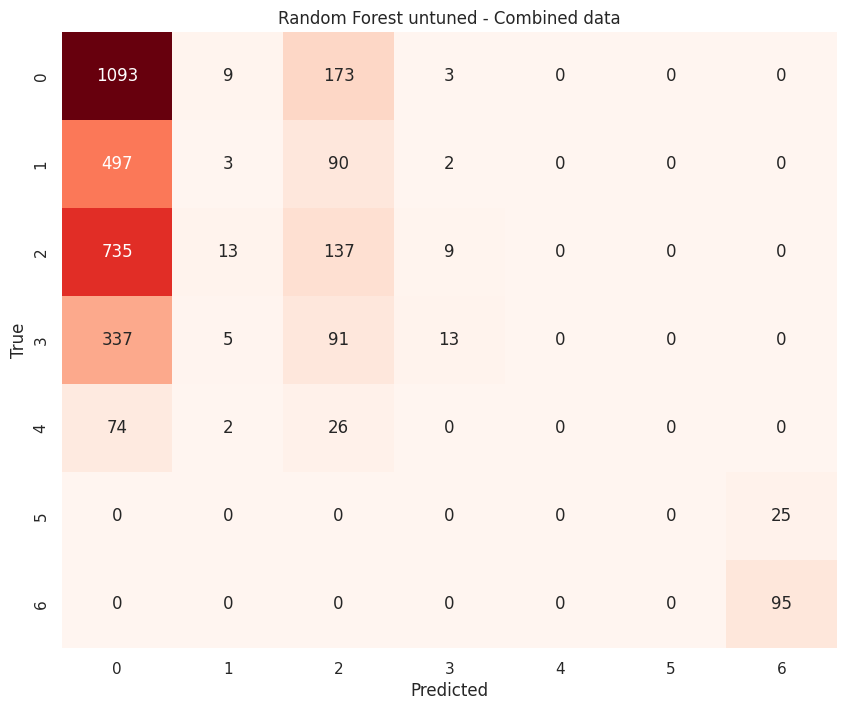

In [ ]:
conf_matrix_combined = confusion_matrix(y_test_combined, predictions_combined)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_combined, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest untuned - Combined data')
plt.show()

ROC-AUC Score: 0.8195847480430085


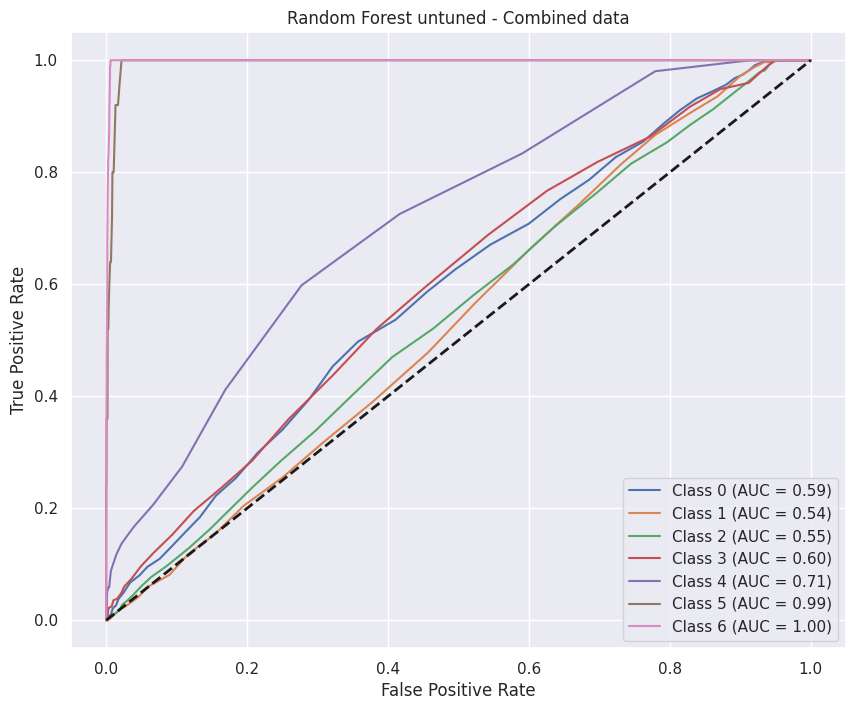

In [ ]:
probas_combined = RF_base.predict_proba(X_test_combined)
roc_auc_combined = roc_auc_score(label_binarize(y_test_combined, classes=np.unique(y_test_combined)), probas_combined, average='micro')
print("ROC-AUC Score:", roc_auc_combined)

fpr_combined = dict()
tpr_combined = dict()
roc_auc_class_combined = dict()

for i in range(probas_combined.shape[1]):
    fpr_combined[i], tpr_combined[i], _ = roc_curve(label_binarize(y_test_combined, classes=np.unique(y_test_combined))[:, i], probas_combined[:, i])
    roc_auc_class_combined[i] = auc(fpr_combined[i], tpr_combined[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(probas_combined.shape[1]):
    plt.plot(fpr_combined[i], tpr_combined[i], label=f'Class {i} (AUC = {roc_auc_class_combined[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest untuned - Combined data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_combined = RF_tuned.predict(X_test_combined)


report_combined = classification_report(y_test_combined, predictions_combined)
print("Classification Report:\n", report_combined)

roc_auc_combined = roc_auc_score(y_test_combined, RF_tuned.predict_proba(X_test_combined), multi_class="ovr")
print("ROC-AUC Score:", roc_auc_combined)

print(RF_tuned.get_params())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.94      0.55      1278
           1       0.00      0.00      0.00       592
           2       0.32      0.08      0.13       894
           3       0.00      0.00      0.00       446
           4       0.00      0.00      0.00       102
           5       0.00      0.00      0.00        25
           6       0.79      1.00      0.88        95

    accuracy                           0.40      3432
   macro avg       0.21      0.29      0.22      3432
weighted avg       0.25      0.40      0.26      3432

ROC-AUC Score: 0.7315921005181897
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 18, 'min_samples_split': 18, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 188, 'n_jobs': None, 'oob_score': False, 'random_s

In [ ]:
micro_f1 = f1_score(y_test_combined, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3324592074592075


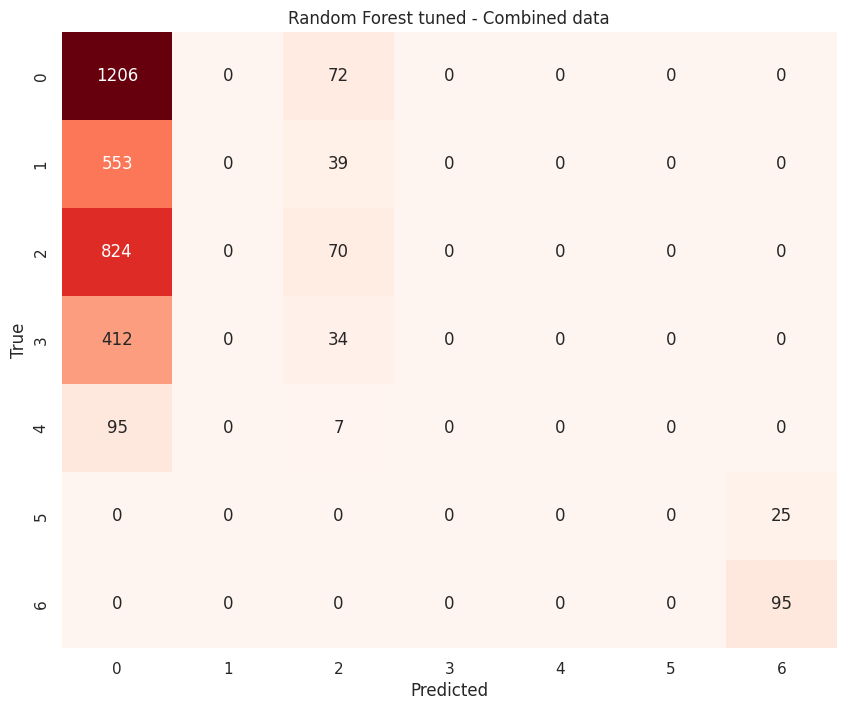

In [ ]:
conf_matrix_combined = confusion_matrix(y_test_combined, predictions_combined)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_combined, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest tuned - Combined data')
plt.show()

ROC-AUC Score: 0.8258137651166497


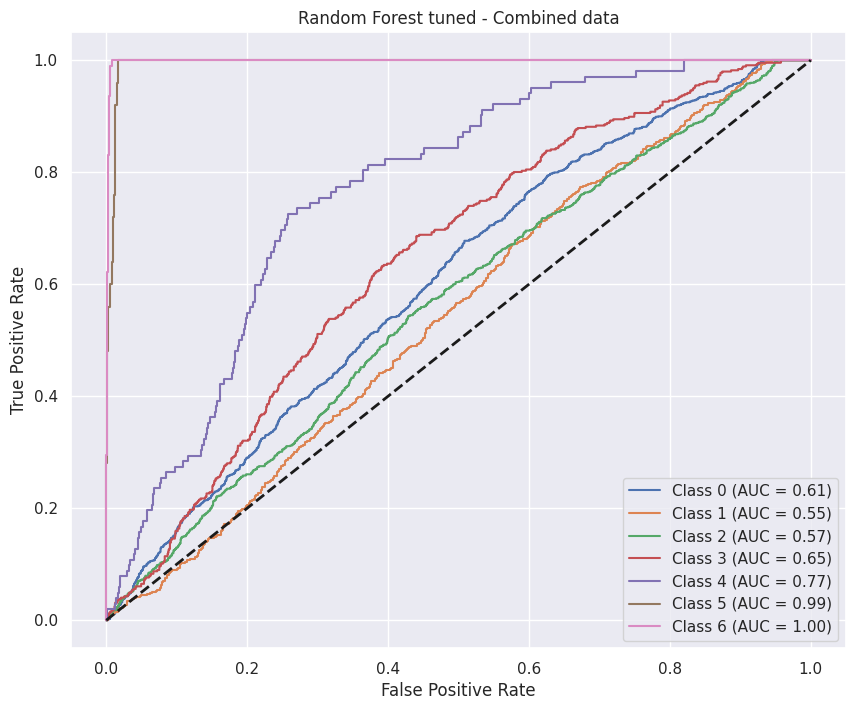

In [ ]:
probas_combined = RF_tuned.predict_proba(X_test_combined)
roc_auc_combined = roc_auc_score(label_binarize(y_test_combined, classes=np.unique(y_test_combined)), probas_combined, average='micro')
print("ROC-AUC Score:", roc_auc_combined)

fpr_combined = dict()
tpr_combined = dict()
roc_auc_class_combined = dict()

for i in range(probas_combined.shape[1]):
    fpr_combined[i], tpr_combined[i], _ = roc_curve(label_binarize(y_test_combined, classes=np.unique(y_test_combined))[:, i], probas_combined[:, i])
    roc_auc_class_combined[i] = auc(fpr_combined[i], tpr_combined[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(probas_combined.shape[1]):
    plt.plot(fpr_combined[i], tpr_combined[i], label=f'Class {i} (AUC = {roc_auc_class_combined[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest tuned - Combined data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_combined = RF_tuned_smote.predict(X_test_combined)

report_combined = classification_report(y_test_combined, predictions_combined)
print("Classification Report:\n", report_combined)

roc_auc_combined = roc_auc_score(y_test_combined, RF_tuned_smote.predict_proba(X_test_combined), multi_class="ovr")
print("ROC-AUC Score:", roc_auc_combined)

print(RF_tuned_smote.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.47      0.46      1278
           1       0.19      0.14      0.16       592
           2       0.28      0.22      0.25       894
           3       0.23      0.29      0.26       446
           4       0.08      0.21      0.12       102
           5       0.73      0.32      0.44        25
           6       0.84      0.97      0.90        95

    accuracy                           0.33      3432
   macro avg       0.40      0.37      0.37      3432
weighted avg       0.33      0.33      0.33      3432

ROC-AUC Score: 0.7315070794764248
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 12, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 185, 'n_jobs': None, 'oob_score': False, 'random_st

In [ ]:
micro_f1 = f1_score(y_test_combined, predictions, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.3324592074592075


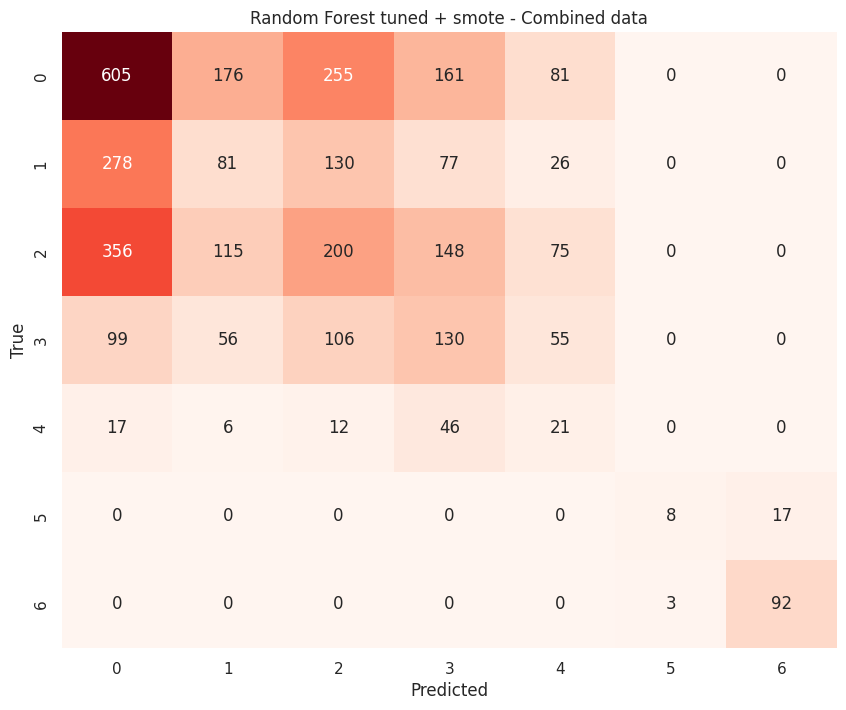

In [ ]:
conf_matrix_combined = confusion_matrix(y_test_combined, predictions_combined)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_combined, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest tuned + smote - Combined data')
plt.show()

ROC-AUC Score: 0.7942210114412911


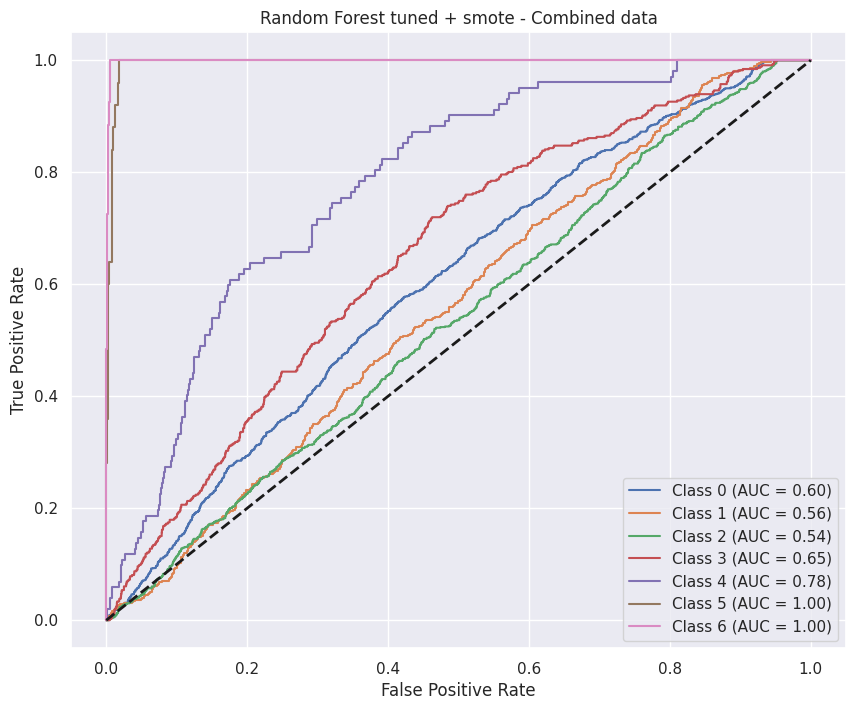

In [ ]:
probas_combined = RF_tuned_smote.predict_proba(X_test_combined)
roc_auc_combined = roc_auc_score(label_binarize(y_test_combined, classes=np.unique(y_test_combined)), probas_combined, average='micro')
print("ROC-AUC Score:", roc_auc_combined)

fpr_combined = dict()
tpr_combined = dict()
roc_auc_class_combined = dict()

for i in range(probas_combined.shape[1]):
    fpr_combined[i], tpr_combined[i], _ = roc_curve(label_binarize(y_test_combined, classes=np.unique(y_test_combined))[:, i], probas_combined[:, i])
    roc_auc_class_combined[i] = auc(fpr_combined[i], tpr_combined[i])


plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(probas_combined.shape[1]):
    plt.plot(fpr_combined[i], tpr_combined[i], label=f'Class {i} (AUC = {roc_auc_class_combined[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest tuned + smote - Combined data')
plt.legend(loc="lower right")
plt.show()

#Random Forest - XRAY

In [ ]:
RF_base_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Random Forest/random_forest_model_Xray.joblib')
RF_tuned_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Random Forest/random_forest_model_tuned_Xray.joblib')
RF_tuned_smote_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Random Forest/random_forest_model_tuned_smote_Xray.joblib')

In [ ]:
predictions_Xray = RF_base_Xray.predict(X_test_Xray)

report_Xray = classification_report(y_test_Xray, predictions_Xray)
print("Classification Report:\n", report_Xray)

roc_auc_Xray = roc_auc_score(y_test_Xray, RF_base_Xray.predict_proba(X_test_Xray), multi_class="ovr")
print("ROC-AUC Score:", roc_auc_Xray)

print(RF_base_Xray.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.86      0.55      1278
           1       0.14      0.01      0.02       592
           2       0.33      0.19      0.24       894
           3       0.35      0.01      0.03       446
           4       0.00      0.00      0.00       102

    accuracy                           0.39      3312
   macro avg       0.25      0.21      0.17      3312
weighted avg       0.32      0.39      0.28      3312

ROC-AUC Score: 0.5873183594698752
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
micro_f1_Xray = f1_score(y_test_Xray, predictions_Xray, average='micro')

print("Micro F1 Score:", micro_f1_Xray)

Micro F1 Score: 0.38737922705314004


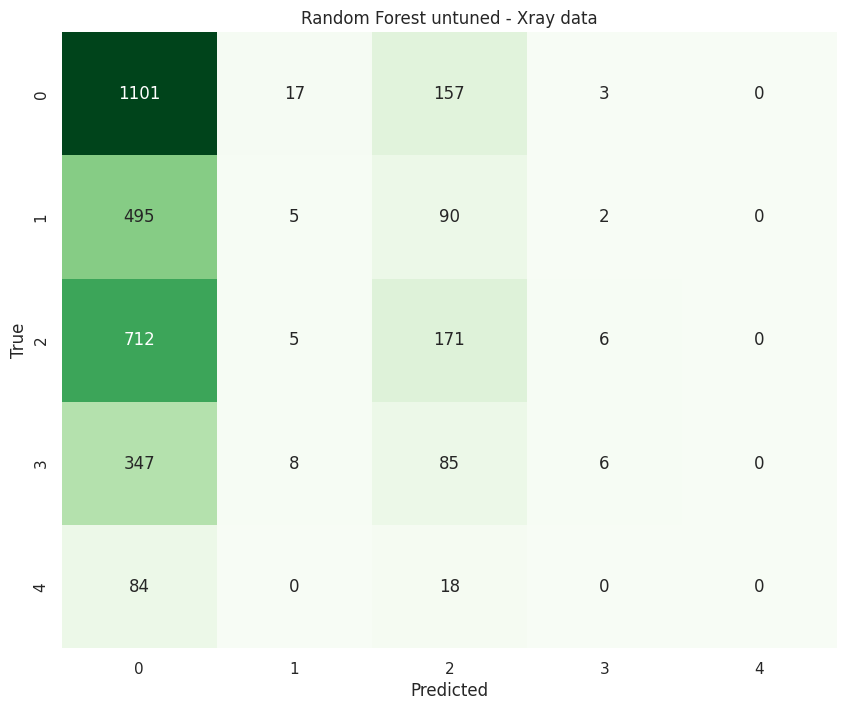

In [ ]:
conf_matrix_Xray = confusion_matrix(y_test_Xray, predictions_Xray)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_Xray, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest untuned - Xray data')
plt.show()

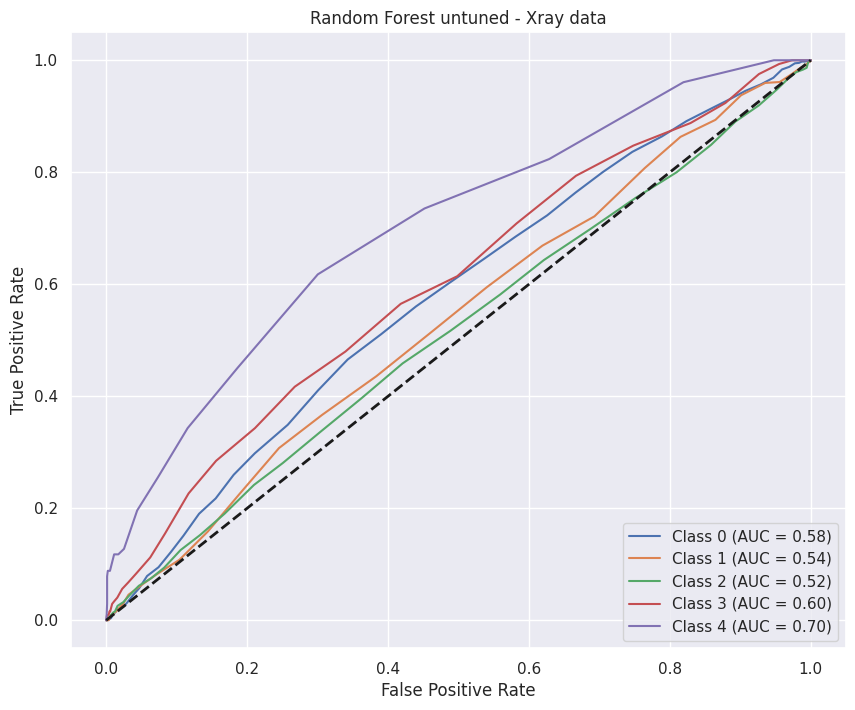

In [ ]:
predictions_Xray = RF_base_Xray.predict_proba(X_test_Xray)

fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_class_Xray = dict()

for i in range(predictions_Xray.shape[1]):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))[:, i], predictions_Xray[:, i])
    roc_auc_class_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(predictions_Xray.shape[1]):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_class_Xray[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest untuned - Xray data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_Xray = RF_tuned_Xray.predict(X_test_Xray)

report_Xray = classification_report(y_test_Xray, predictions_Xray)
print("Classification Report:\n", report_Xray)

roc_auc_Xray = roc_auc_score(y_test_Xray, RF_tuned_Xray.predict_proba(X_test_Xray), multi_class="ovr")
print("ROC-AUC Score:", roc_auc_Xray)

print(RF_tuned_Xray.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.95      0.56      1278
           1       0.00      0.00      0.00       592
           2       0.31      0.10      0.15       894
           3       0.00      0.00      0.00       446
           4       0.00      0.00      0.00       102

    accuracy                           0.39      3312
   macro avg       0.14      0.21      0.14      3312
weighted avg       0.24      0.39      0.26      3312

ROC-AUC Score: 0.6072274522639348
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 9, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 183, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
micro_f1_Xray = f1_score(y_test_Xray, predictions_Xray, average='micro')

print("Micro F1 Score:", micro_f1_Xray)

Micro F1 Score: 0.391304347826087


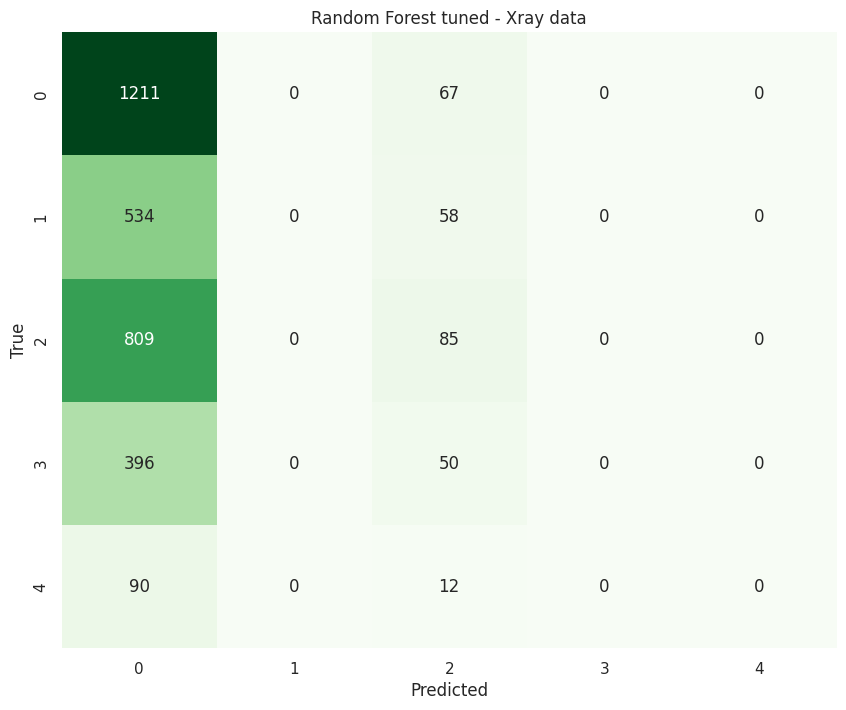

In [ ]:
conf_matrix_Xray = confusion_matrix(y_test_Xray, predictions_Xray)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_Xray, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest tuned - Xray data')
plt.show()

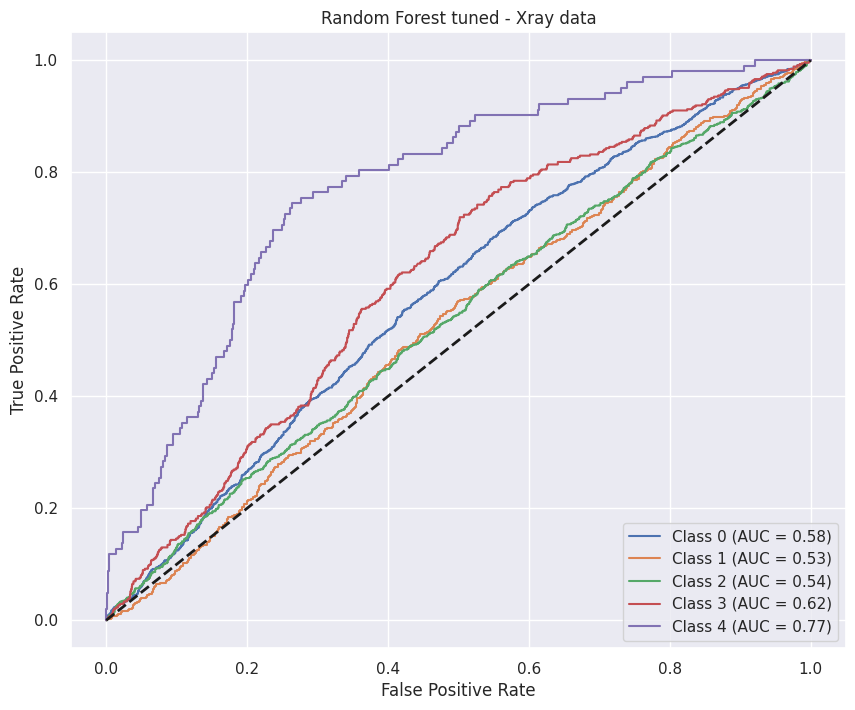

In [ ]:
predictions_Xray = RF_tuned_Xray.predict_proba(X_test_Xray)

fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_class_Xray = dict()

for i in range(predictions_Xray.shape[1]):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))[:, i], predictions_Xray[:, i])
    roc_auc_class_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(predictions_Xray.shape[1]):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_class_Xray[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest tuned - Xray data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_Xray = RF_tuned_smote_Xray.predict(X_test_Xray)

report_Xray = classification_report(y_test_Xray, predictions_Xray)
print("Classification Report:\n", report_Xray)

roc_auc_Xray = roc_auc_score(y_test_Xray, RF_tuned_smote_Xray.predict_proba(X_test_Xray), multi_class="ovr")
print("ROC-AUC Score:", roc_auc_Xray)

print(RF_tuned_smote_Xray.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.95      0.56      1278
           1       0.00      0.00      0.00       592
           2       0.31      0.10      0.15       894
           3       0.00      0.00      0.00       446
           4       0.00      0.00      0.00       102

    accuracy                           0.39      3312
   macro avg       0.14      0.21      0.14      3312
weighted avg       0.24      0.39      0.26      3312

ROC-AUC Score: 0.6072274522639348
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 9, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 183, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
micro_f1_Xray = f1_score(y_test_Xray, predictions_Xray, average='micro')

print("Micro F1 Score:", micro_f1_Xray)

Micro F1 Score: 0.391304347826087


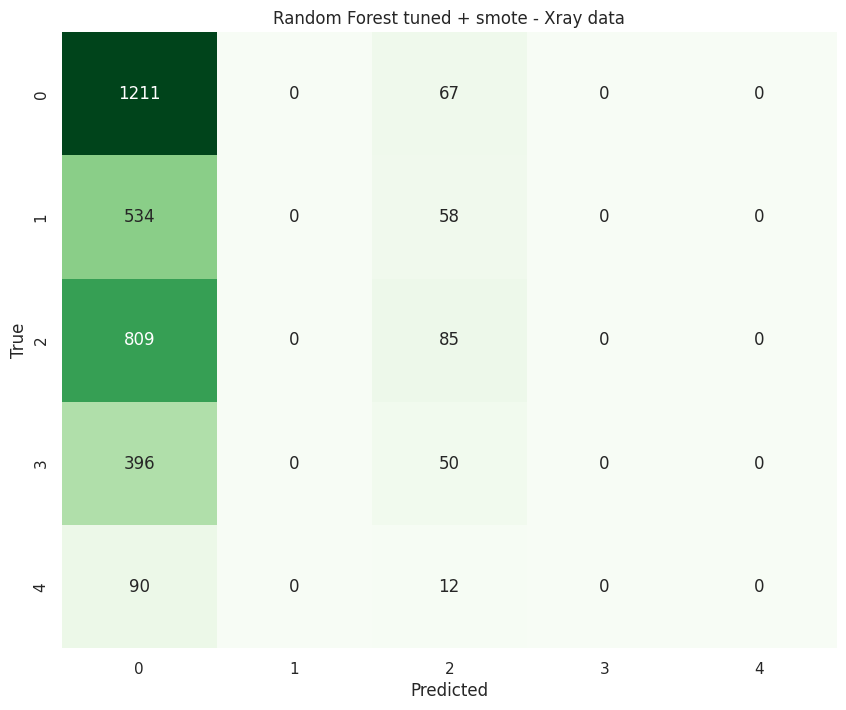

In [ ]:
conf_matrix_Xray = confusion_matrix(y_test_Xray, predictions_Xray)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_Xray, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest tuned + smote - Xray data')
plt.show()

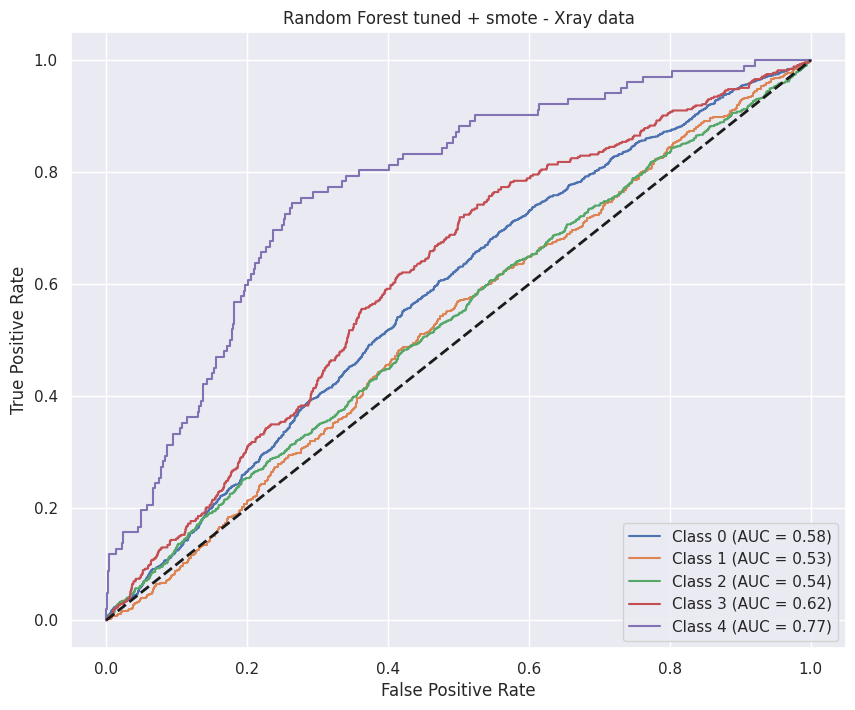

In [ ]:
predictions_Xray = RF_tuned_smote_Xray.predict_proba(X_test_Xray)

fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_class_Xray = dict()

for i in range(predictions_Xray.shape[1]):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))[:, i], predictions_Xray[:, i])
    roc_auc_class_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i in range(predictions_Xray.shape[1]):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_class_Xray[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest tuned + smote - Xray data')
plt.legend(loc="lower right")
plt.show()

#Random Forest - MRI

In [ ]:
RF_base_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Random Forest/random_forest_model_MRNet.joblib')
RF_tuned_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Random Forest/random_forest_model_tuned_MRNet.joblib')
RF_tuned_smote_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/Random Forest/random_forest_model_tuned_smote_MRNet.joblib')

In [ ]:
predictions_MRI = RF_base_MRI.predict(X_test_MRI)

report_MRI = classification_report(y_test_MRI, predictions_MRI)
print("Classification Report:\n", report_MRI)

roc_auc_MRI = roc_auc_score(y_test_MRI, RF_base_MRI.predict_proba(X_test_MRI)[:, 1])
print("ROC-AUC Score:", roc_auc_MRI)

print(RF_base_MRI.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120

ROC-AUC Score: 0.7764210526315789
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predictions_MRI, average='micro')

print("Micro F1 Score for MRI:", micro_f1_MRI)

Micro F1 Score for MRI: 0.7916666666666666


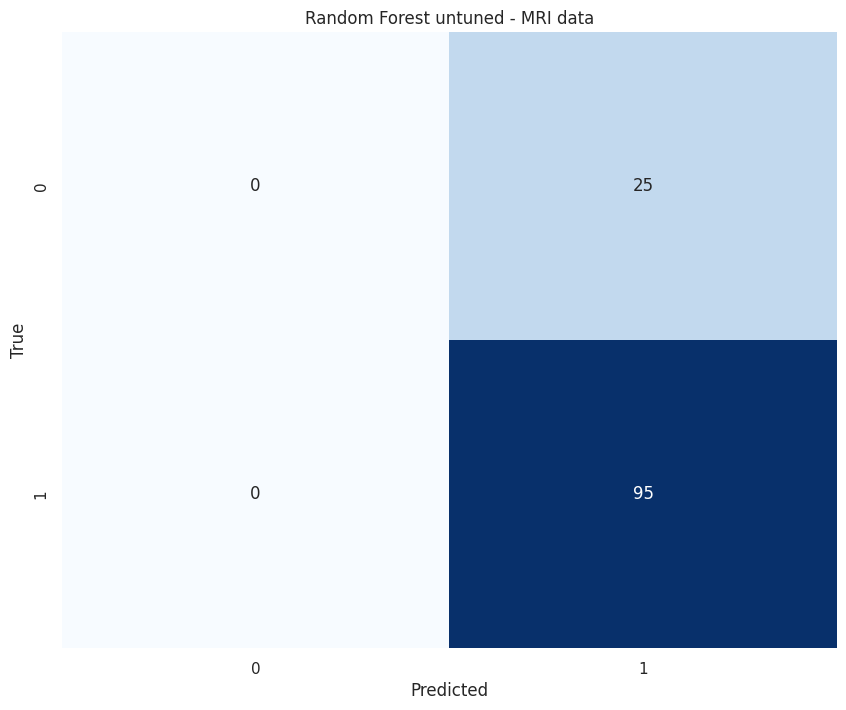

In [ ]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, predictions_MRI)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest untuned - MRI data')
plt.show()

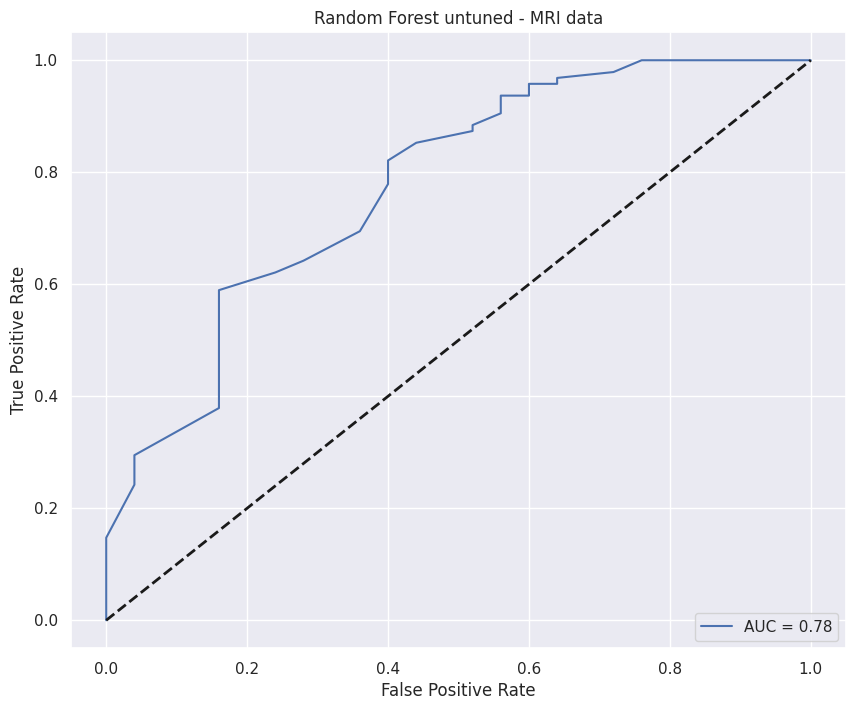

In [ ]:
predictions_proba_MRI = RF_base_MRI.predict_proba(X_test_MRI)[:, 1]

fpr_MRI, tpr_MRI, _ = roc_curve(y_test_MRI, predictions_proba_MRI)
roc_auc_MRI = auc(fpr_MRI, tpr_MRI)

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

plt.plot(fpr_MRI, tpr_MRI, label=f'AUC = {roc_auc_MRI:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest untuned - MRI data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_MRI = RF_tuned_MRI.predict(X_test_MRI)

report_MRI = classification_report(y_test_MRI, predictions_MRI)
print("Classification Report:\n", report_MRI)

roc_auc_MRI = roc_auc_score(y_test_MRI, RF_tuned_MRI.predict_proba(X_test_MRI)[:, 1])
print("ROC-AUC Score:", roc_auc_MRI)

print(RF_tuned_MRI.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120

ROC-AUC Score: 0.8467368421052631
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 72, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predictions_MRI, average='micro')

print("Micro F1 Score for MRI:", micro_f1_MRI)

Micro F1 Score for MRI: 0.7916666666666666


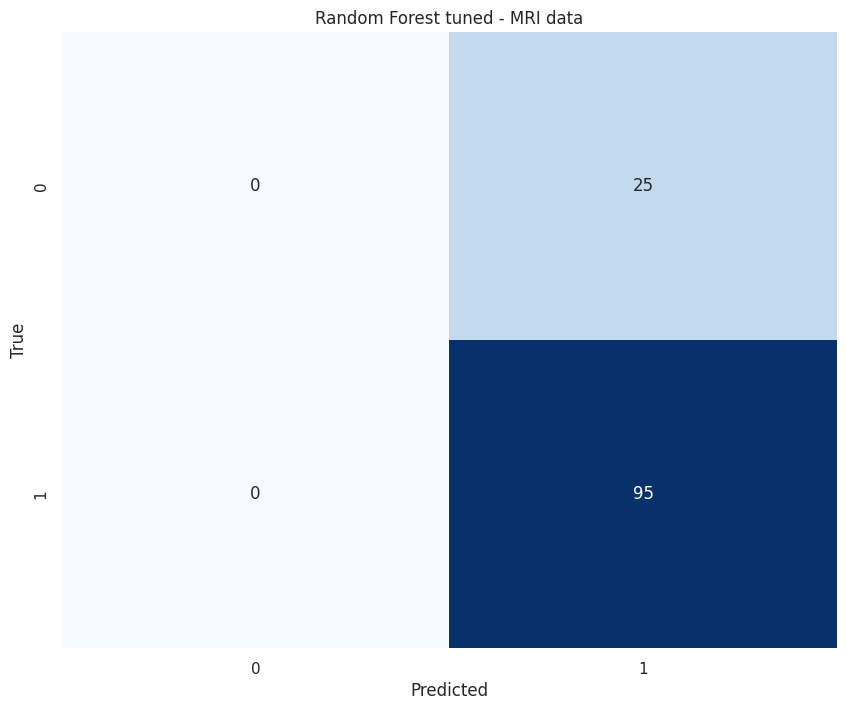

In [ ]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, predictions_MRI)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest tuned - MRI data')
plt.show()

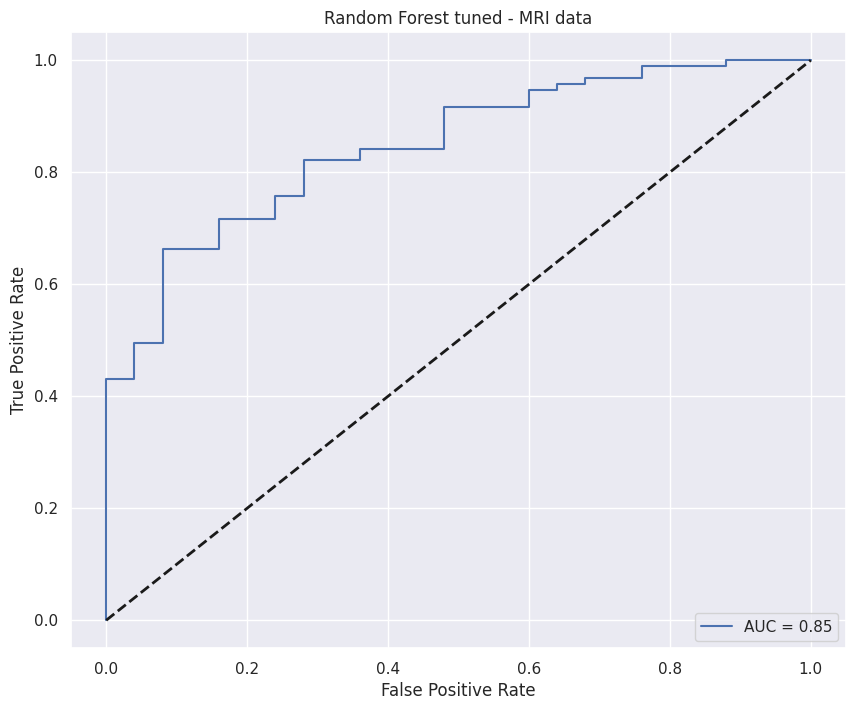

In [ ]:
predictions_proba_MRI = RF_tuned_MRI.predict_proba(X_test_MRI)[:, 1]

fpr_MRI, tpr_MRI, _ = roc_curve(y_test_MRI, predictions_proba_MRI)
roc_auc_MRI = auc(fpr_MRI, tpr_MRI)

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

plt.plot(fpr_MRI, tpr_MRI, label=f'AUC = {roc_auc_MRI:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest tuned - MRI data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions_MRI = RF_tuned_smote_MRI.predict(X_test_MRI)

report_MRI = classification_report(y_test_MRI, predictions_MRI)
print("Classification Report:\n", report_MRI)

roc_auc_MRI = roc_auc_score(y_test_MRI, RF_tuned_smote_MRI.predict_proba(X_test_MRI)[:, 1])
print("ROC-AUC Score:", roc_auc_MRI)

print(RF_tuned_smote_MRI.get_params())

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.64      0.59        25
           1       0.90      0.86      0.88        95

    accuracy                           0.82       120
   macro avg       0.73      0.75      0.74       120
weighted avg       0.83      0.82      0.82       120

ROC-AUC Score: 0.8252631578947368
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 14, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 73, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
micro_f1_MRI = f1_score(y_test_MRI, predictions_MRI, average='micro')

print("Micro F1 Score for MRI:", micro_f1_MRI)

Micro F1 Score for MRI: 0.8166666666666667


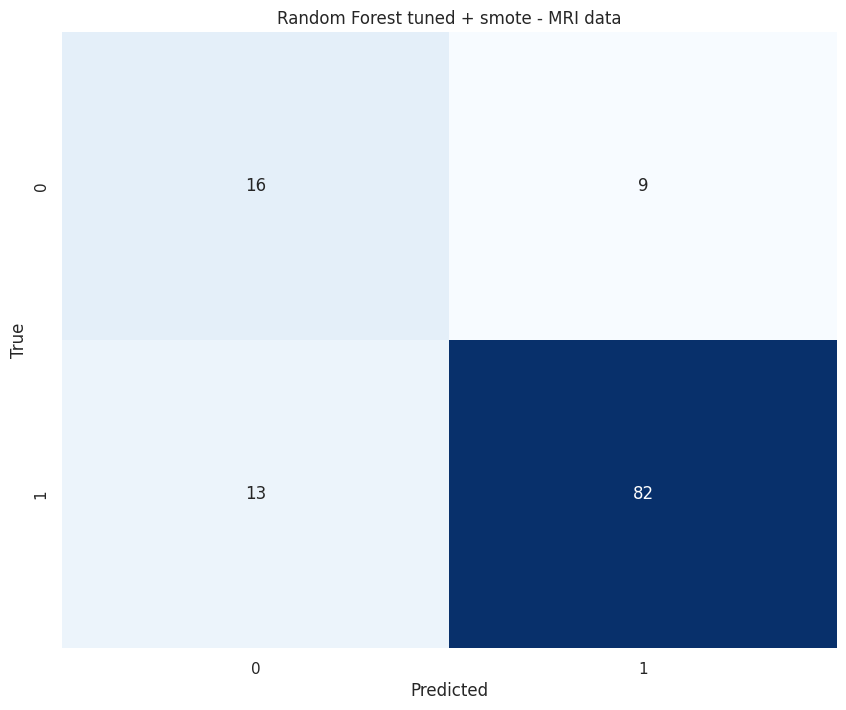

In [ ]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, predictions_MRI)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest tuned + smote - MRI data')
plt.show()

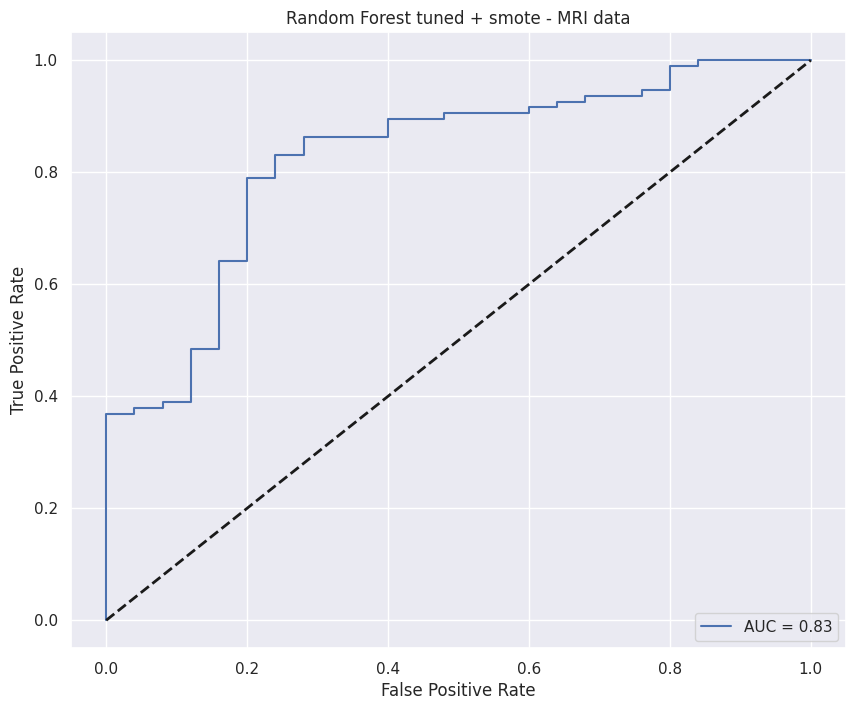

In [ ]:
predictions_proba_MRI = RF_tuned_smote_MRI.predict_proba(X_test_MRI)[:, 1]

fpr_MRI, tpr_MRI, _ = roc_curve(y_test_MRI, predictions_proba_MRI)
roc_auc_MRI = auc(fpr_MRI, tpr_MRI)

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

plt.plot(fpr_MRI, tpr_MRI, label=f'AUC = {roc_auc_MRI:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest tuned + smote - MRI data')
plt.legend(loc="lower right")
plt.show()

#=============================================================================

#KNN

In [4]:
knn_model = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/KNN/KNN.joblib')
knn_Xray = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/KNN/KNN_Xray.joblib')
knn_MRI = joblib.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/Models/KNN/KNN_MRI.joblib')

In [5]:
y_test_combined_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))

y_pred_test = knn_model.predict(X_test_combined)
y_pred_proba_test = knn_model.predict_proba(X_test_combined)

roc_auc_test = roc_auc_score(y_test_combined_binary, y_pred_proba_test, multi_class='ovr')
print(f"Test ROC-AUC Value: {roc_auc_test:.2f}")

f1_micro_test = f1_score(y_test_combined, y_pred_test, average='micro')
print(f"Test Micro F1-Score: {f1_micro_test:.2f}")

print("Test Classification Report:\n", classification_report(y_test_combined, y_pred_test))

Test ROC-AUC Value: 0.65
Test Micro F1-Score: 0.34
Test Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.56      0.47      1278
           1       0.20      0.19      0.19       592
           2       0.29      0.25      0.27       894
           3       0.15      0.08      0.10       446
           4       0.17      0.08      0.11       102
           5       0.50      0.12      0.19        25
           6       0.81      0.64      0.72        95

    accuracy                           0.34      3432
   macro avg       0.36      0.27      0.29      3432
weighted avg       0.31      0.34      0.32      3432



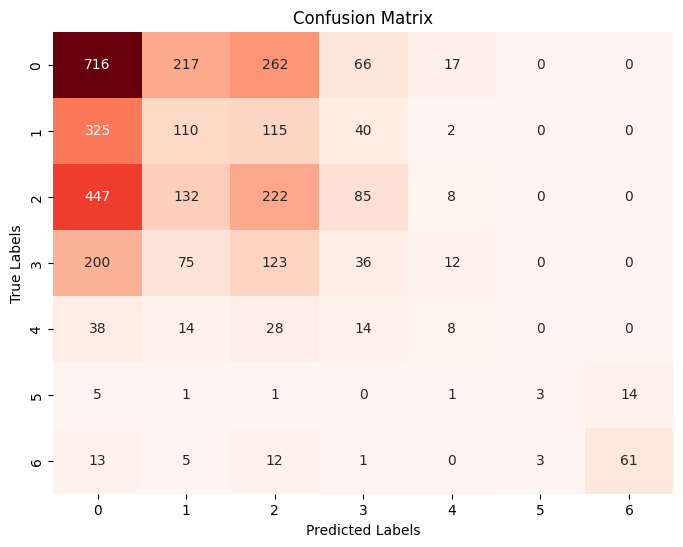

In [7]:
conf_matrix = confusion_matrix(y_test_combined, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=np.unique(y_test_combined),
            yticklabels=np.unique(y_test_combined))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

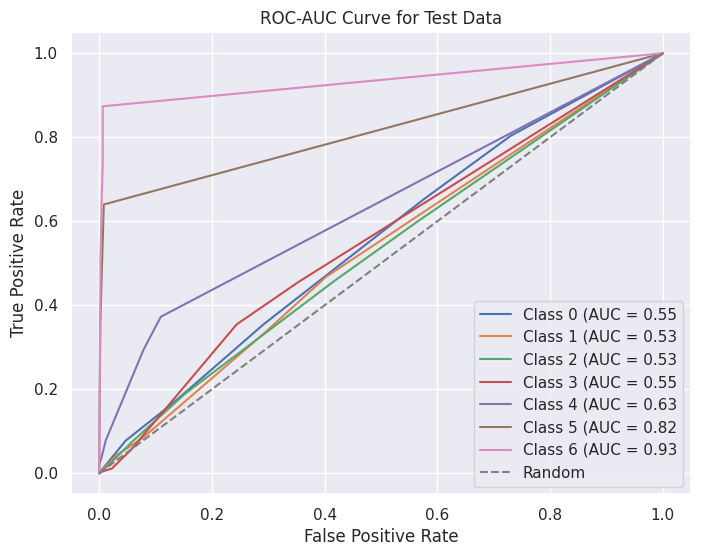

In [16]:
y_test_combined_binary = label_binarize(y_test_combined, classes=np.unique(y_test_combined))
n_classes = y_test_combined_binary.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
sns.set(style="darkgrid")
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_combined_binary[:, i], y_pred_proba_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Test Data')
plt.legend()
plt.show()

In [11]:
y_test_Xray_binary = label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))

y_pred_test_Xray = knn_Xray.predict(X_test_Xray)
y_pred_proba_test_Xray = knn_Xray.predict_proba(X_test_Xray)

roc_auc_test_Xray = roc_auc_score(y_test_Xray_binary, y_pred_proba_test_Xray, multi_class='ovr')
print(f"X-ray Test ROC-AUC Value: {roc_auc_test_Xray:.2f}")

accuracy_test_Xray = accuracy_score(y_test_Xray, y_pred_test_Xray)
print(f"X-ray Test Accuracy: {accuracy_test_Xray:.2f}")

print("X-ray Test Classification Report:\n", classification_report(y_test_Xray, y_pred_test_Xray))

f1_micro_test = f1_score(y_test_Xray, y_pred_test_Xray, average='micro')
print(f"Test Micro F1-Score: {f1_micro_test:.2f}")

X-ray Test ROC-AUC Value: 0.55
X-ray Test Accuracy: 0.33
X-ray Test Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.56      0.48      1278
           1       0.20      0.19      0.19       592
           2       0.30      0.25      0.27       894
           3       0.15      0.08      0.10       446
           4       0.17      0.08      0.11       102

    accuracy                           0.33      3312
   macro avg       0.25      0.23      0.23      3312
weighted avg       0.30      0.33      0.31      3312

Test Micro F1-Score: 0.33


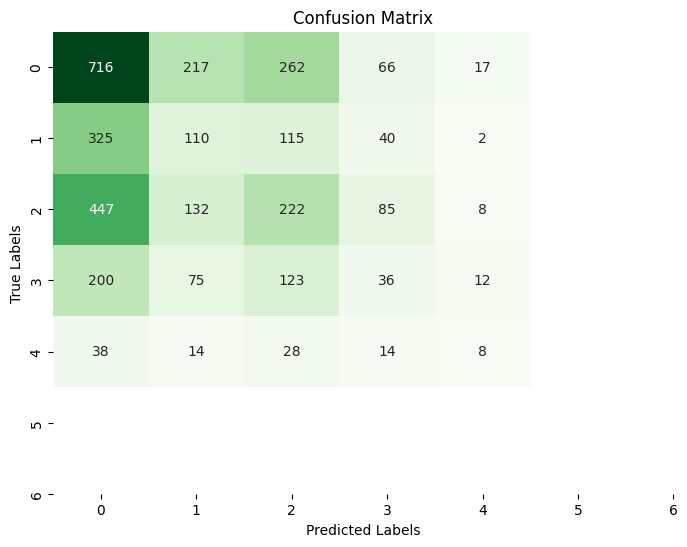

In [12]:
conf_matrix = confusion_matrix(y_test_Xray, y_pred_test_Xray)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=np.unique(y_test_combined),
            yticklabels=np.unique(y_test_combined))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

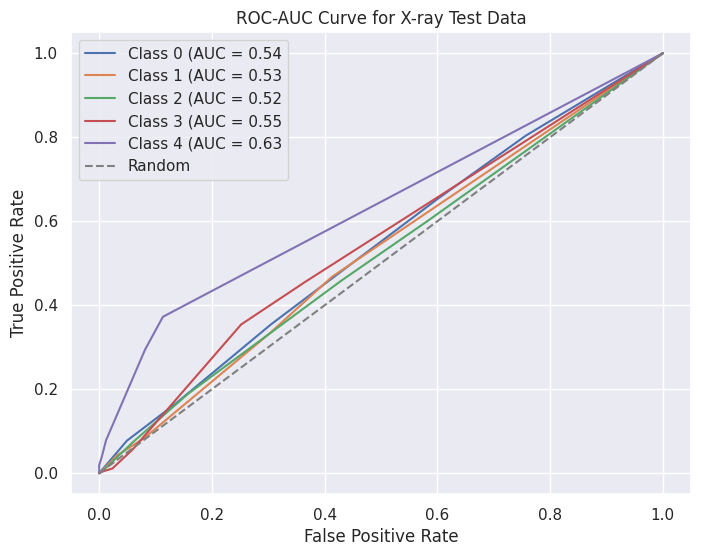

In [18]:
y_test_Xray_binary = label_binarize(y_test_Xray, classes=np.unique(y_test_Xray))
n_classes_Xray = y_test_Xray_binary.shape[1]

fpr_Xray = dict()
tpr_Xray = dict()
roc_auc_Xray = dict()

for i in range(n_classes_Xray):
    fpr_Xray[i], tpr_Xray[i], _ = roc_curve(y_test_Xray_binary[:, i], y_pred_proba_test_Xray[:, i])
    roc_auc_Xray[i] = auc(fpr_Xray[i], tpr_Xray[i])

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

for i in range(n_classes_Xray):
    plt.plot(fpr_Xray[i], tpr_Xray[i], label=f'Class {i} (AUC = {roc_auc_Xray[i]:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for X-ray Test Data')
plt.legend()
plt.show()

In [13]:
y_pred_test_MRI = knn_MRI.predict(X_test_MRI)

accuracy_test_MRI = accuracy_score(y_test_MRI, y_pred_test_MRI)
print(f"MRI Test Accuracy: {accuracy_test_MRI:.2f}")

print("MRI Test Classification Report:\n", classification_report(y_test_MRI, y_pred_test_MRI))

f1_micro_test_MRI = f1_score(y_test_MRI, y_pred_test_MRI, average='micro')
print(f"MRI Test Micro F1-Score: {f1_micro_test_MRI:.2f}")

y_test_one_hot = label_binarize(y_test_MRI, classes=np.unique(y_test_MRI))
y_pred_one_hot = label_binarize(y_pred_test_MRI, classes=np.unique(y_test_MRI))

roc_auc_test_MRI = roc_auc_score(y_test_one_hot, y_pred_one_hot, average='micro')
print(f"MRI Test ROC-AUC Score: {roc_auc_test_MRI:.2f}")

MRI Test Accuracy: 0.78
MRI Test Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.16      0.24        25
           1       0.81      0.95      0.87        95

    accuracy                           0.78       120
   macro avg       0.63      0.55      0.55       120
weighted avg       0.73      0.78      0.74       120

MRI Test Micro F1-Score: 0.78
MRI Test ROC-AUC Score: 0.55


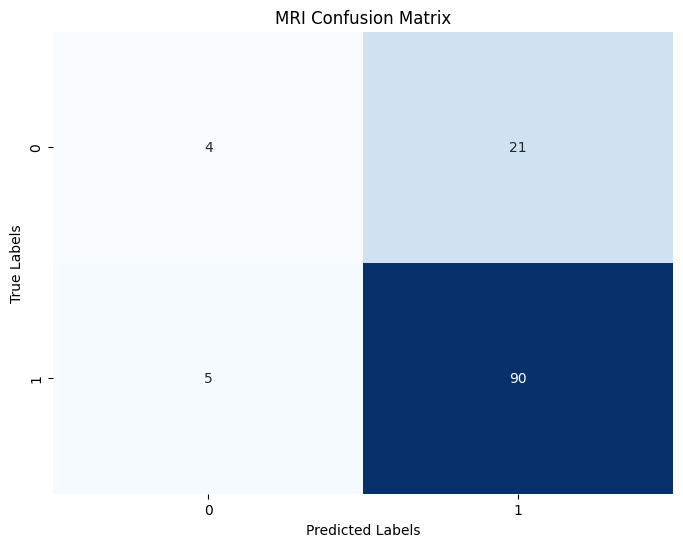

In [14]:
conf_matrix_MRI = confusion_matrix(y_test_MRI, y_pred_test_MRI)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_MRI, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_MRI),
            yticklabels=np.unique(y_test_MRI))
plt.title('MRI Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

MRI Test ROC-AUC Score: 0.55


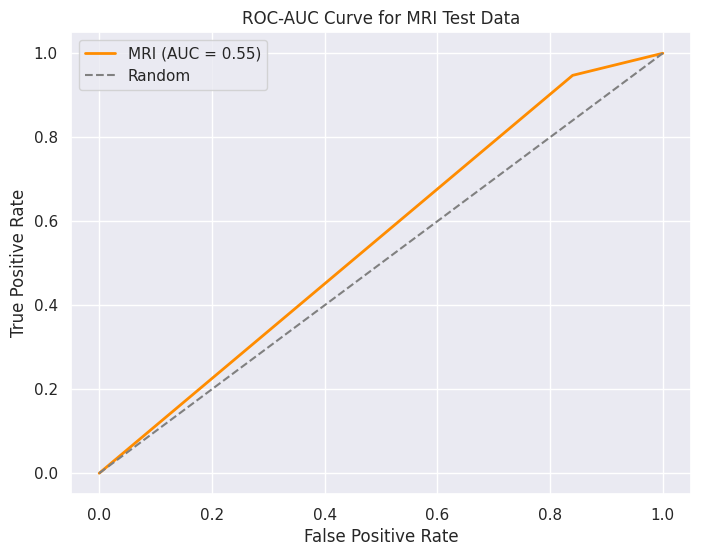

In [19]:
y_test_one_hot_MRI = label_binarize(y_test_MRI, classes=np.unique(y_test_MRI))
y_pred_one_hot_MRI = label_binarize(y_pred_test_MRI, classes=np.unique(y_test_MRI))

roc_auc_test_MRI = roc_auc_score(y_test_one_hot_MRI, y_pred_one_hot_MRI, average='micro')
print(f"MRI Test ROC-AUC Score: {roc_auc_test_MRI:.2f}")


fpr_MRI, tpr_MRI, _ = roc_curve(y_test_one_hot_MRI.ravel(), y_pred_one_hot_MRI.ravel())


sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr_MRI, tpr_MRI, color='darkorange', lw=2, label=f'MRI (AUC = {roc_auc_test_MRI:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for MRI Test Data')
plt.legend()
plt.show()